# **1. Introduction**





## **1.1 Problem Statement**

As a data scientist working with a healthcare provider, your task is to help predict whether patients will drop out of a long-term treatment program based on their interaction with various stages of the program. The dataset provided includes anonymized information about patients’ activities, goals, progress reviews, and online interacons with the healthcare system. The aim is to build a logistic regression model that accurately predicts whether a certain patient is expected to drop out or not, identify key factors contributing to patient dropout, and evaluate the trained model using appropriate metrics.

## **1.3 Assignment Structure**

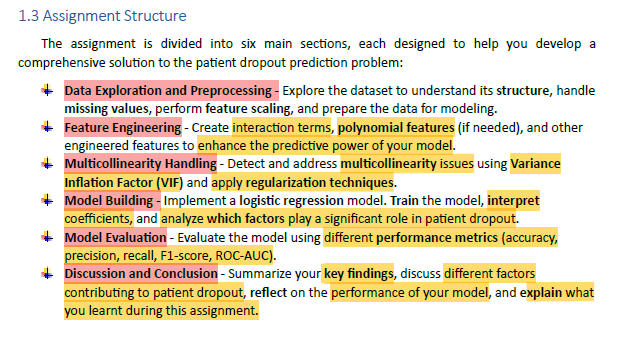

# **2. Data Exploration and Preprocessing**

### Importing the essential libraries

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

### Importing the dataset

In [ ]:
df = pd.read_csv('/content/data_patient_dropout.csv')
df

Patient ID Initial Consultation Attended  \
0          ID_0                           Yes   
1          ID_1                            No   
2          ID_2                            No   
3          ID_3                            No   
4          ID_4                           Yes   
...         ...                           ...   
4279    ID_4279                           Yes   
4280    ID_4280                            No   
4281    ID_4281                            No   
4282    ID_4282                            No   
4283    ID_4283                            No   

      Number of Treatment Sessions Attended  Number of Treatment Goals Set  \
0                                         4                            1.0   
1                                        38                            0.0   
2                                         8                            5.0   
3                                         6                            0.0   
4                                        31                           14.0   
...                                     ...                            ...   
4279                                     23                            5.0   
4280                                      7                            2.0   
4281                                      4                            1.0   
4282                                      8                            3.0   
4283                                     31                            4.0   

      Number of Treatment Goals Revised  Number of Progress Reviews Attended  \
0                                     0                                  0.0   
1                                     0                                  2.0   
2                                     0                                  0.0   
3                                     0                                  2.0   
4                                    12                                  1.0   
...                                 ...                                  ...   
4279                                  6                                  2.0   
4280                                  0                                  3.0   
4281                                  0                                  1.0   
4282                                  0                                  1.0   
4283                                  0                                  3.0   

      Number of Times Treatment Plan Confirmed  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   
...                                        ...   
4279                                         0   
4280                                         0   
4281                                         0   
4282                                         0   
4283                                         0   

      Number of Times Treatment Phase Initiated  \
0                                             0   
1                                             0   
2                                             1   
3                                             0   
4                                             0   
...                                         ...   
4279                                          0   
4280                                          0   
4281                                          1   
4282                                          1   
4283                                          1   

      Number of Treatment Options Explored  \
0                                        1   
1                                        2   
2                                        1   
3                                        4   
4                                        4   
...                         

### Understanding the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient ID                                 4284 non-null   object 
 1   Initial Consultation Attended              4284 non-null   object 
 2   Number of Treatment Sessions Attended      4284 non-null   int64  
 3   Number of Treatment Goals Set              4275 non-null   float64
 4   Number of Treatment Goals Revised          4284 non-null   int64  
 5   Number of Progress Reviews Attended        4275 non-null   float64
 6   Number of Times Treatment Plan Confirmed   4284 non-null   int64  
 7   Number of Times Treatment Phase Initiated  4284 non-null   int64  
 8   Number of Treatment Options Explored       4284 non-null   int64  
 9   Number of Times Logged Into Health Portal  4284 non-null   int64  
 10  Number of Educational Re

In [ ]:
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")


Patient ID: 4284
Initial Consultation Attended: 2
Number of Treatment Sessions Attended: 98
Number of Treatment Goals Set: 41
Number of Treatment Goals Revised: 35
Number of Progress Reviews Attended: 23
Number of Times Treatment Plan Confirmed: 10
Number of Times Treatment Phase Initiated: 12
Number of Treatment Options Explored: 45
Number of Times Logged Into Health Portal: 4
Number of Educational Resources Viewed: 28
Patient Segment Type: 3
Treatment Dropped: 2


In [ ]:
# the unique values in Number of Times Logged Into Health Portal
print(df['Number of Times Logged Into Health Portal'].unique())

# checking the unique values in Number of Times Treatment Plan Confirmed:
print(df['Number of Times Treatment Plan Confirmed'].unique())

[0 1 2 3]
[ 0  1  2  8  3  4  5 11  7  6]


### Dividing the columns into three categories


1.   **Numerical Data:**
      * Number of Treatment Sessions Attended
      * Number of Treatment Goals Set
      * Number of Treatment Goals Revised
      * Number of Progress Reviews Attended
      * Number of Times Treatment Plan Confirmed
      * Number of Times Treatment Phase Initiated
      * Number of Treatment Options Explored
      * Number of Educational Resources Viewed
      * Number of Times Logged Into Health Portal

2.   **Categorical Data:**
      * Initial Consultation Attended
      * Patient Segment Type
      * Treatment Dropped

3.   **Mixed Data:**
      * Patient ID



###**Univariate Analysis**

Univariate analysis focuses on analyzing each feature in the dataset independently.



*   **Distribution analysis:** The distribution of each feature is examined to identify its shape, central tendency, and dispersion
*   **Identifying potential issues:** Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values



#### Steps of doing Univariate Analysis on Numerical columns

**Descriptive Statistics:** Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations:** Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

**Identifying Outliers:** Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### **Numerical Variables**

####  **Number of Treatment Sessions Attended**

**summary of analysis:**


*   the median of data of this column is 10 while the maximum value is 436
*   not normally distributed
*   KDE and skew value shows that this variable has highly positively skewed data
*   according to boxplot so many outliers



In [ ]:
df['Number of Treatment Sessions Attended'].describe()

count    4284.000000
mean       13.878151
std        15.934084
min         0.000000
25%         6.000000
50%        10.000000
75%        17.000000
max       436.000000
Name: Number of Treatment Sessions Attended, dtype: float64

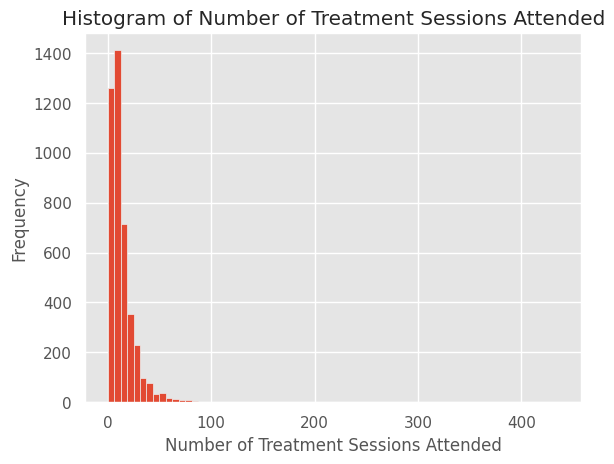

In [ ]:
# histogram
df['Number of Treatment Sessions Attended'].plot(kind='hist', bins= 70)
plt.title('Histogram of Number of Treatment Sessions Attended')
plt.xlabel('Number of Treatment Sessions Attended')
plt.ylabel('Frequency')
plt.show()

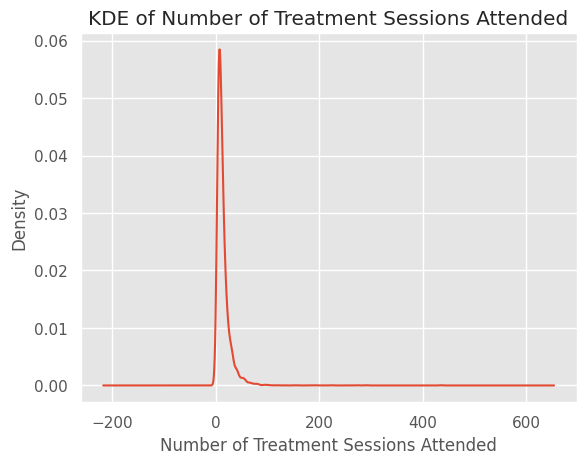

In [ ]:
# A kernel density estimate (KDE) plot
df['Number of Treatment Sessions Attended'].plot(kind='kde')
plt.title('KDE of Number of Treatment Sessions Attended')
plt.xlabel('Number of Treatment Sessions Attended')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Treatment Sessions Attended'].skew()

9.192731412758544

Text(0.5, 1.0, 'Box Plot of Number of Treatment Sessions Attended')

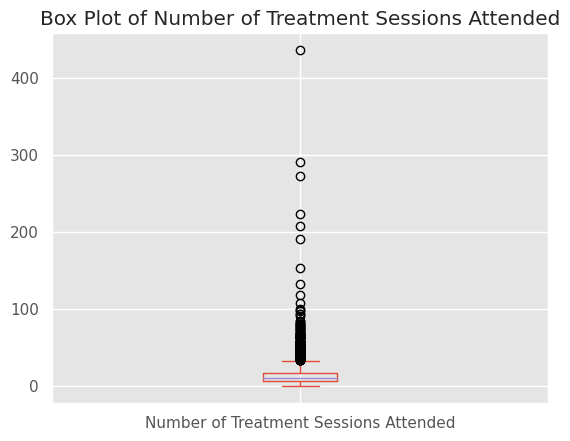

In [ ]:
# box plot for observing the outliers
df['Number of Treatment Sessions Attended'].plot(kind='box')
plt.title('Box Plot of Number of Treatment Sessions Attended')

In [ ]:
# Calculate the IQR
Q1 = df['Number of Treatment Sessions Attended'].quantile(0.25)
Q3 = df['Number of Treatment Sessions Attended'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows with outliers
outlier_rows = df[(df['Number of Treatment Sessions Attended'] < lower_bound) | (df['Number of Treatment Sessions Attended'] > upper_bound)]

# Print the rows with outliers
outlier_rows


Patient ID Initial Consultation Attended  \
1          ID_1                            No   
18        ID_18                            No   
21        ID_21                            No   
46        ID_46                            No   
68        ID_68                           Yes   
...         ...                           ...   
4222    ID_4222                            No   
4248    ID_4248                           Yes   
4253    ID_4253                           Yes   
4267    ID_4267                            No   
4270    ID_4270                            No   

      Number of Treatment Sessions Attended  Number of Treatment Goals Set  \
1                                        38                            0.0   
18                                       35                            NaN   
21                                       35                           14.0   
46                                       38                           13.0   
68                                       34                           26.0   
...                                     ...                            ...   
4222                                     52                           12.0   
4248                                    118                           30.0   
4253                                     77                           31.0   
4267                                     79                           22.0   
4270                                     58                            0.0   

      Number of Treatment Goals Revised  Number of Progress Reviews Attended  \
1                                     0                                  2.0   
18                                    8                                  6.0   
21                                    0                                  3.0   
46                                    0                                  5.0   
68                                    5                                  0.0   
...                                 ...                                  ...   
4222                                 13                                  3.0   
4248                                 43                                 17.0   
4253                                  0                                  2.0   
4267                                 13                                 14.0   
4270                                  0                                  8.0   

      Number of Times Treatment Plan Confirmed  \
1                                            0   
18                                           0   
21                                           1   
46                                           1   
68                                           0   
...                                        ...   
4222                                         1   
4248                                         0   
4253                                         0   
4267                                         1   
4270                                         1   

      Number of Times Treatment Phase Initiated  \
1                                             0   
18                                            2   
21                                            3   
46                                            0   
68                                            0   
...                                         ...   
4222                                          2   
4248                                          1   
4253                                          5   
4267                                          1   
4270                                          2   

      Number of Treatment Options Explored  \
1                                        2   
18                                       1   
21                                       3   
46                                      13   
68                                       1   
...                         

#### **Number of Treatment Goals Set**

**Summary of analysis**

*   The medina is 2 and maximum value is 225
*   75% of the values are less than 5
*   not normally distributed
*   positively skewed
*   so many outliers evident from boxpolot



In [ ]:
df['Number of Treatment Goals Set'].describe()

count    4275.000000
mean        3.488421
std         6.789401
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       225.000000
Name: Number of Treatment Goals Set, dtype: float64

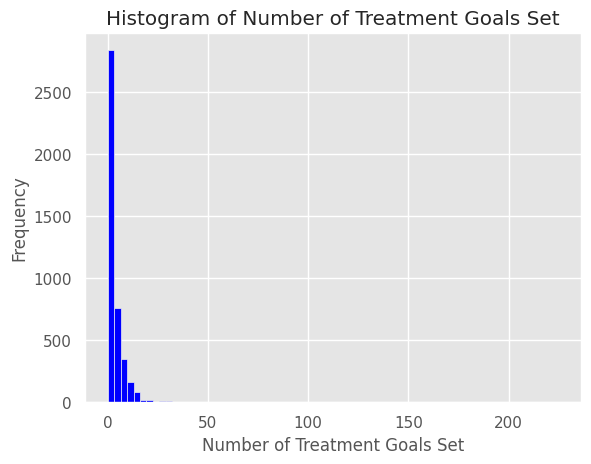

In [ ]:
# histogram
df['Number of Treatment Goals Set'].plot(kind='hist', bins= 70, color='blue')
plt.title('Histogram of Number of Treatment Goals Set')
plt.xlabel('Number of Treatment Goals Set')
plt.ylabel('Frequency')
plt.show()

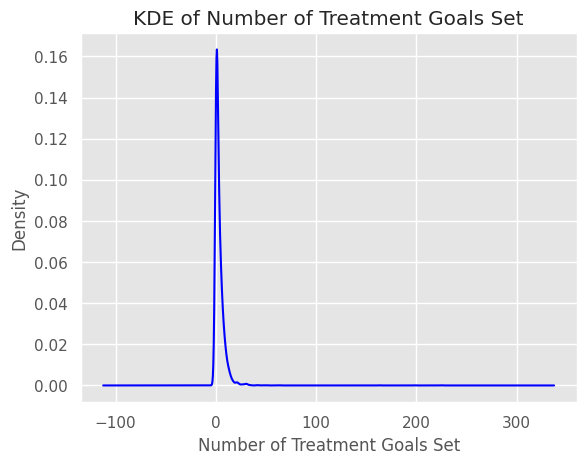

In [ ]:
# KDE
df['Number of Treatment Goals Set'].plot(kind='kde', color='blue')
plt.title('KDE of Number of Treatment Goals Set')
plt.xlabel('Number of Treatment Goals Set')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Treatment Goals Set'].skew()

17.620771963055336

Text(0.5, 1.0, 'Box Plot of Number of Treatment Goals Set')

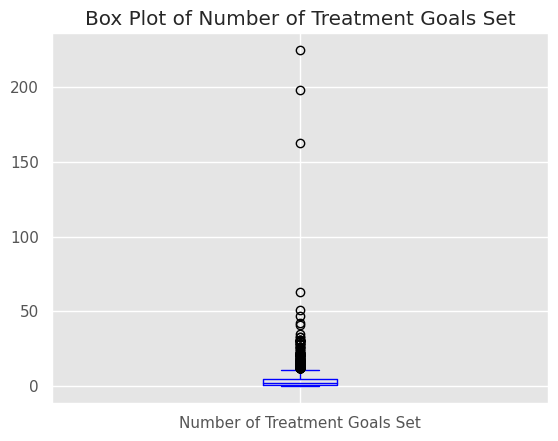

In [ ]:
# box plot for checking the number of outliers
df['Number of Treatment Goals Set'].plot(kind='box', color = 'blue')
plt.title('Box Plot of Number of Treatment Goals Set')

In [ ]:
# rows with outliers
# Calculate the IQR
Q1 = df['Number of Treatment Goals Set'].quantile(0.25)
Q3 = df['Number of Treatment Goals Set'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows with outliers
outlier_rows = df[(df['Number of Treatment Goals Set'] < lower_bound) | (df['Number of Treatment Goals Set'] > upper_bound)]

# Print the rows with outliers
outlier_rows


Patient ID Initial Consultation Attended  \
4          ID_4                           Yes   
21        ID_21                            No   
26        ID_26                           Yes   
37        ID_37                            No   
46        ID_46                            No   
...         ...                           ...   
4222    ID_4222                            No   
4248    ID_4248                           Yes   
4253    ID_4253                           Yes   
4259    ID_4259                            No   
4267    ID_4267                            No   

      Number of Treatment Sessions Attended  Number of Treatment Goals Set  \
4                                        31                           14.0   
21                                       35                           14.0   
26                                       24                           13.0   
37                                       23                           14.0   
46                                       38                           13.0   
...                                     ...                            ...   
4222                                     52                           12.0   
4248                                    118                           30.0   
4253                                     77                           31.0   
4259                                     21                           12.0   
4267                                     79                           22.0   

      Number of Treatment Goals Revised  Number of Progress Reviews Attended  \
4                                    12                                  1.0   
21                                    0                                  3.0   
26                                    0                                  2.0   
37                                    0                                  2.0   
46                                    0                                  5.0   
...                                 ...                                  ...   
4222                                 13                                  3.0   
4248                                 43                                 17.0   
4253                                  0                                  2.0   
4259                                  1                                  2.0   
4267                                 13                                 14.0   

      Number of Times Treatment Plan Confirmed  \
4                                            0   
21                                           1   
26                                           2   
37                                           1   
46                                           1   
...                                        ...   
4222                                         1   
4248                                         0   
4253                                         0   
4259                                         0   
4267                                         1   

      Number of Times Treatment Phase Initiated  \
4                                             0   
21                                            3   
26                                            0   
37                                            1   
46                                            0   
...                                         ...   
4222                                          2   
4248                                          1   
4253                                          5   
4259                                          0   
4267                                          1   

      Number of Treatment Options Explored  \
4                                        4   
21                                       3   
26                                       6   
37                                       1   
46                                      13   
...                         

#### **Number of Treatment Goals Revised**

**Summary of analysis**


*   Median is zero
*   maximum value is 50
*   not normally distributed
*   highly positively skewed
*   all the values above 0 are shown as outliers in the box plot



In [ ]:
df['Number of Treatment Goals Revised'].describe()

count    4284.000000
mean        0.867180
std         3.070022
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        50.000000
Name: Number of Treatment Goals Revised, dtype: float64

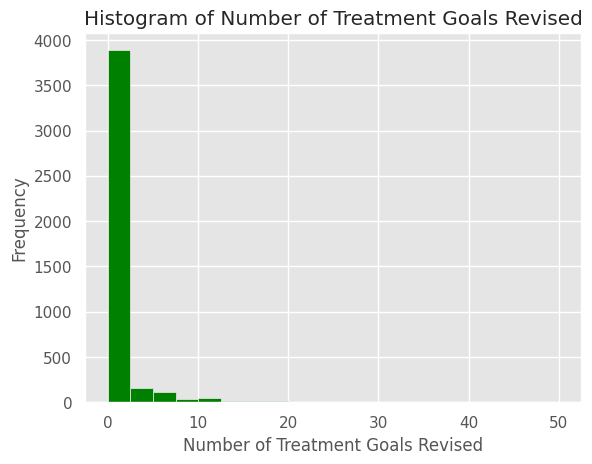

In [ ]:
# histogram
df['Number of Treatment Goals Revised'].plot(kind= 'hist' , bins = 20, color = 'green')
plt.title('Histogram of Number of Treatment Goals Revised')
plt.xlabel('Number of Treatment Goals Revised')
plt.ylabel('Frequency')
plt.show()

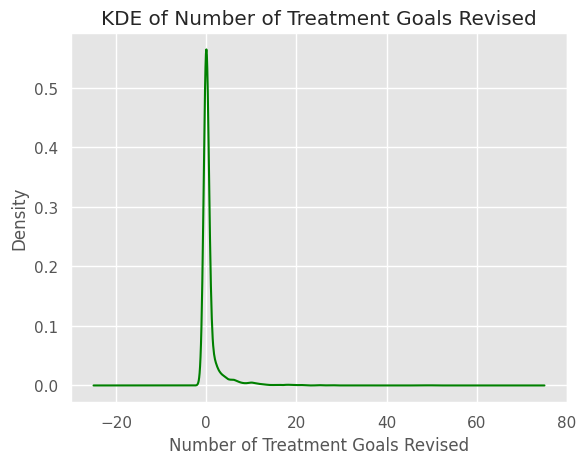

In [ ]:
# A kernel density estimate (KDE) plot
df['Number of Treatment Goals Revised'].plot(kind='kde', color= 'green')
plt.title('KDE of Number of Treatment Goals Revised')
plt.xlabel('Number of Treatment Goals Revised')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Treatment Goals Set'].skew()

17.620771963055336

Text(0.5, 1.0, 'Box Plot of Number of Treatment Goals Revised')

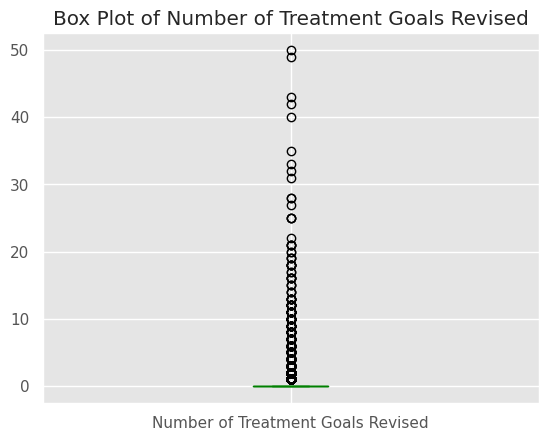

In [ ]:
# boxplot for outliers
df['Number of Treatment Goals Revised'].plot(kind='box' , color= 'green')
plt.title('Box Plot of Number of Treatment Goals Revised')

#### **Number of Progress Reviews Attended**

**Summary of analysis**


*   median is 1
*   maximum value is 34
*   not normal
*   positively skewed



In [ ]:
df['Number of Progress Reviews Attended'].describe()

count    4275.000000
mean        1.444211
std         2.082496
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        34.000000
Name: Number of Progress Reviews Attended, dtype: float64

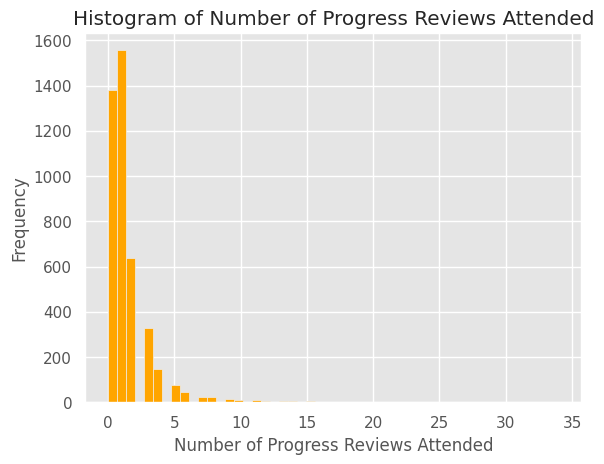

In [ ]:
# histogram
df['Number of Progress Reviews Attended'].plot(kind='hist', bins= 50, color='orange')
plt.title('Histogram of Number of Progress Reviews Attended')
plt.xlabel('Number of Progress Reviews Attended')
plt.ylabel('Frequency')
plt.show()

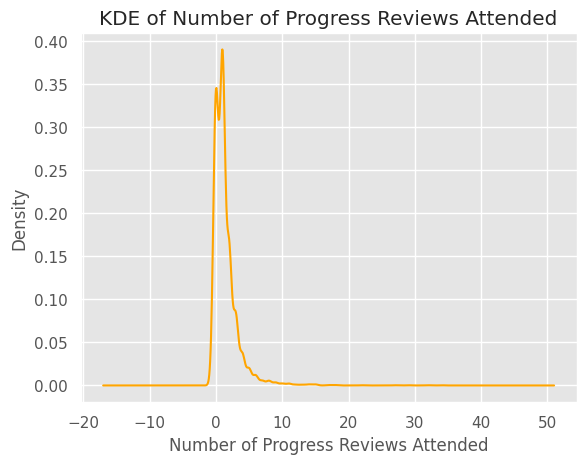

In [ ]:
# KDE (kernel density estimation)
df['Number of Progress Reviews Attended'].plot(kind='kde', color='orange')
plt.title('KDE of Number of Progress Reviews Attended')
plt.xlabel('Number of Progress Reviews Attended')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Progress Reviews Attended'].skew()

5.082517553871084

Text(0.5, 1.0, 'Box Plot of Number of Progress Reviews Attended')

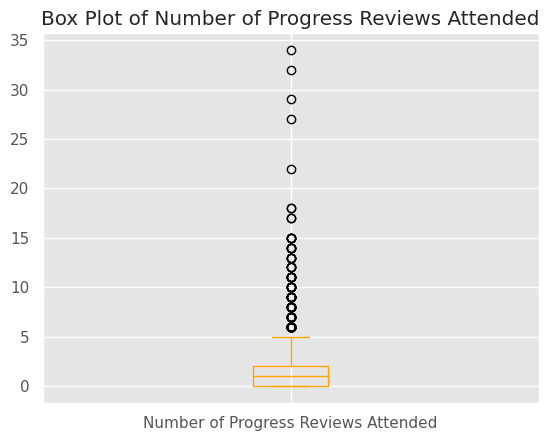

In [ ]:
# boxplot
df['Number of Progress Reviews Attended'].plot(kind='box', color='orange')
plt.title('Box Plot of Number of Progress Reviews Attended')

#### **Number of Times Treatment Plan Confirmed**

**Summary of analysis**


*   median is 0
*   maximum value is 11
*   not normal
*   positively skewed



In [ ]:
df['Number of Times Treatment Plan Confirmed'].describe()

count    4284.000000
mean        0.187208
std         0.517691
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: Number of Times Treatment Plan Confirmed, dtype: float64

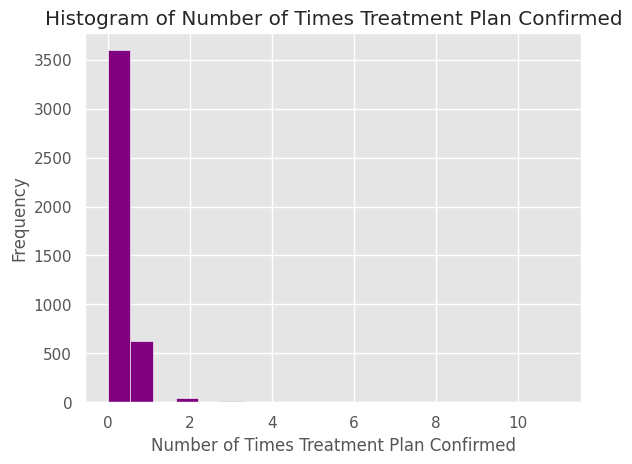

In [ ]:
# histogram
df['Number of Times Treatment Plan Confirmed'].plot(kind='hist', bins= 20, color='purple')
plt.title('Histogram of Number of Times Treatment Plan Confirmed')
plt.xlabel('Number of Times Treatment Plan Confirmed')
plt.ylabel('Frequency')
plt.show()

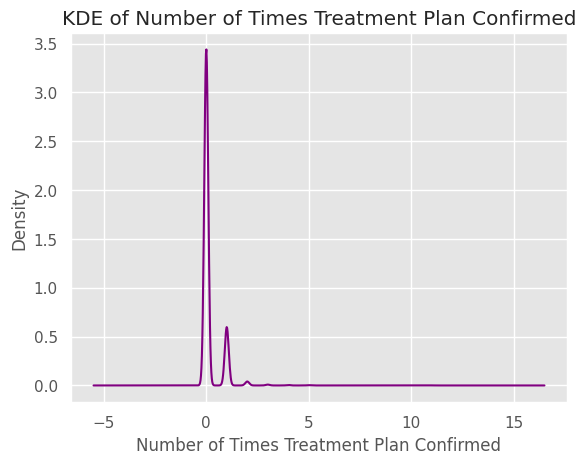

In [ ]:
# KDE (kernel density estimation)
df['Number of Times Treatment Plan Confirmed'].plot(kind='kde', color='purple')
plt.title('KDE of Number of Times Treatment Plan Confirmed')
plt.xlabel('Number of Times Treatment Plan Confirmed')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Times Treatment Plan Confirmed'].skew()

6.106870149217233

Text(0.5, 1.0, 'Box Plot of Number of Times Treatment Plan Confirmed')

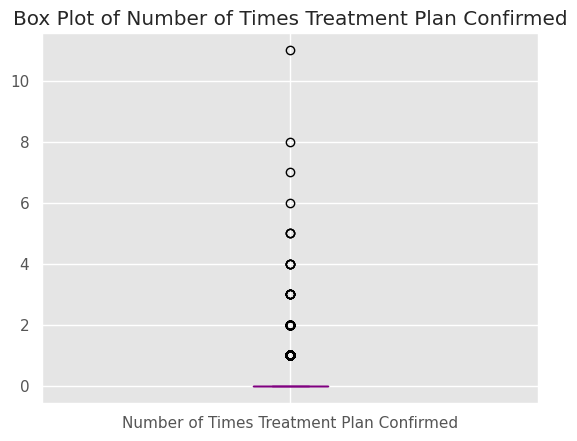

In [ ]:
# boxplot
df['Number of Times Treatment Plan Confirmed'].plot(kind='box', color='purple')
plt.title('Box Plot of Number of Times Treatment Plan Confirmed')

#### **Number of Times Treatment Phase Initiated**

**Summary of analysis**


*   median is 1
*   maximum value is 14
*   near to normal from positive side as compared to the previously observed variables



In [ ]:
df['Number of Times Treatment Phase Initiated'].describe()

count    4284.000000
mean        0.980159
std         1.140525
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: Number of Times Treatment Phase Initiated, dtype: float64

Text(0, 0.5, 'Frequency')

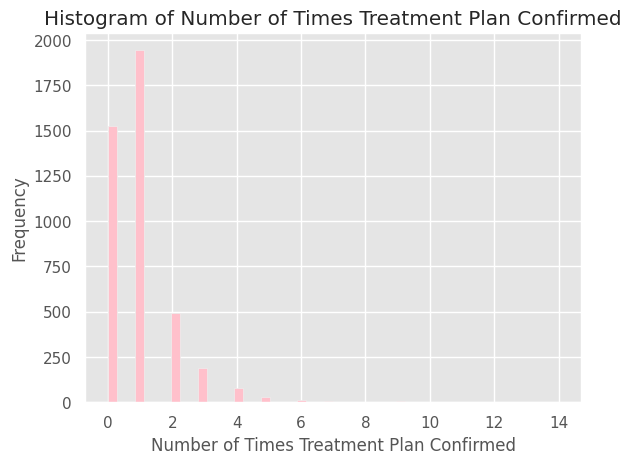

In [ ]:
# histogram
df['Number of Times Treatment Phase Initiated'].plot(kind='hist', bins= 50, color='pink')
plt.title('Histogram of Number of Times Treatment Plan Confirmed')
plt.xlabel('Number of Times Treatment Plan Confirmed')
plt.ylabel('Frequency')

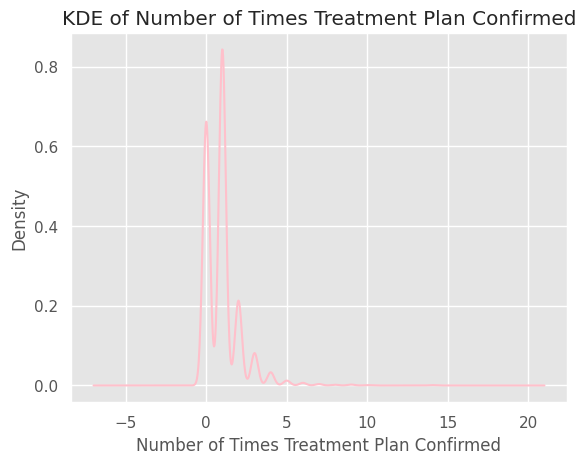

In [ ]:
# KDE (kernel density estimation)
df['Number of Times Treatment Phase Initiated'].plot(kind='kde', color='pink')
plt.title('KDE of Number of Times Treatment Plan Confirmed')
plt.xlabel('Number of Times Treatment Plan Confirmed')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Times Treatment Phase Initiated'].skew()

2.8379680731539305

Text(0.5, 1.0, 'Box Plot of Number of Times Treatment Plan Confirmed')

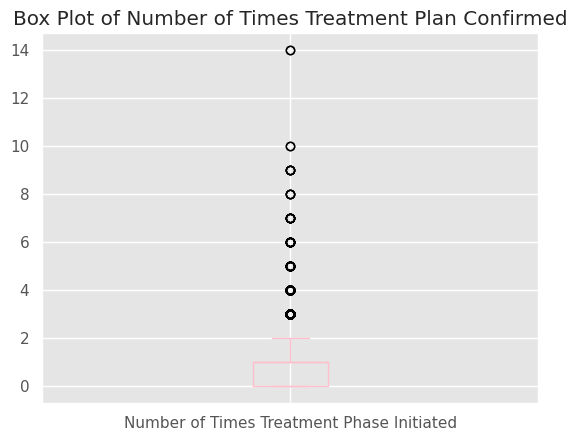

In [ ]:
# boxplot
df['Number of Times Treatment Phase Initiated'].plot(kind='box', color='pink')
plt.title('Box Plot of Number of Times Treatment Plan Confirmed')

#### **Number of Treatment Options Explored**

**Summary of analysis**




*  median is 1
*   not normal
*   highly positively skewed
*   maximum value is 256





In [ ]:
df['Number of Treatment Options Explored'].describe()

count    4284.000000
mean        2.295985
std         6.052666
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       256.000000
Name: Number of Treatment Options Explored, dtype: float64

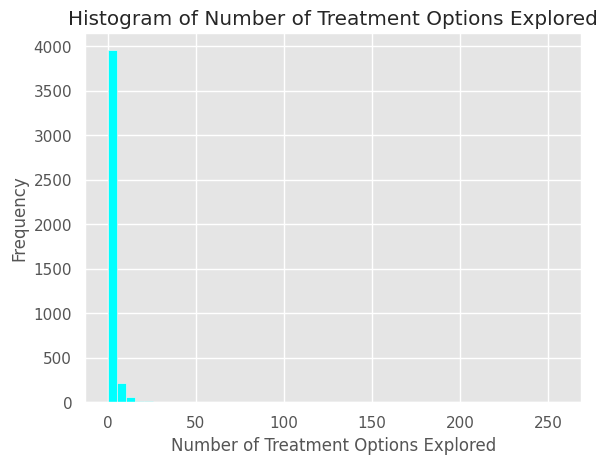

In [ ]:
# histogram
df['Number of Treatment Options Explored'].plot(kind='hist', bins= 50, color='cyan')
plt.title('Histogram of Number of Treatment Options Explored')
plt.xlabel('Number of Treatment Options Explored')
plt.ylabel('Frequency')
plt.show()

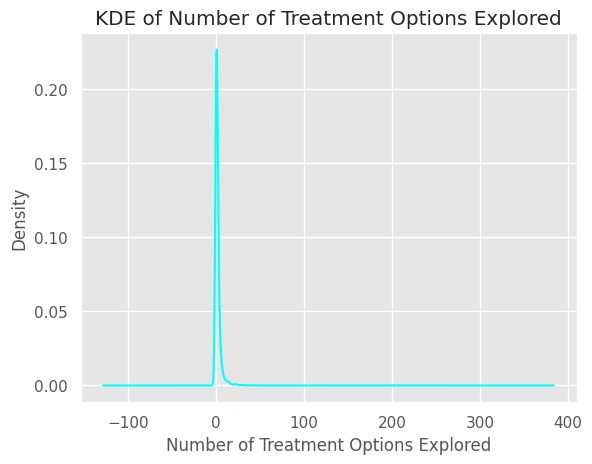

In [ ]:
# KDE (kernel density estimation)
df['Number of Treatment Options Explored'].plot(kind='kde', color='cyan')
plt.title('KDE of Number of Treatment Options Explored')
plt.xlabel('Number of Treatment Options Explored')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Treatment Options Explored'].skew()

22.175313590638684

Text(0.5, 1.0, 'Box Plot of Number of Treatment Options Explored')

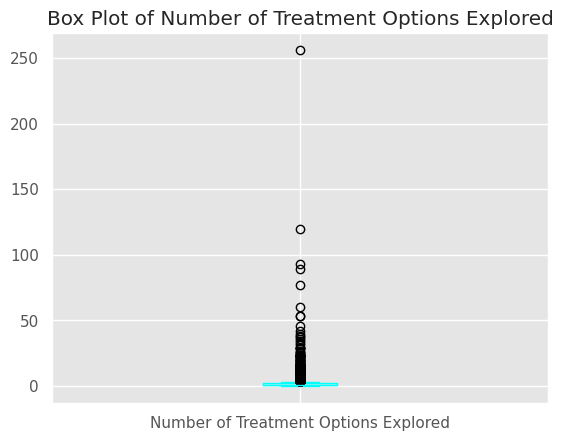

In [ ]:
# boxplot
df['Number of Treatment Options Explored'].plot(kind='box', color='cyan')
plt.title('Box Plot of Number of Treatment Options Explored')

#### **Number of Educational Resources Viewed**

**Summary of analysis**




*  median is 2
*  maximum value is 35
*  nearly normal from positive
*  outliers are shown in boxplot






In [ ]:
df['Number of Educational Resources Viewed'].describe()

count    4284.000000
mean        2.348506
std         2.868862
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: Number of Educational Resources Viewed, dtype: float64

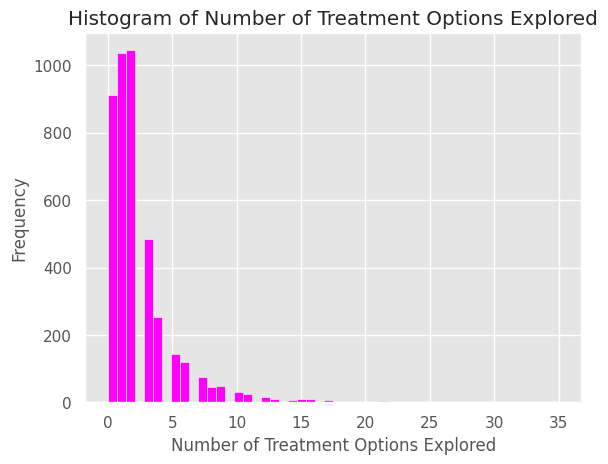

In [ ]:
# histogram
df['Number of Educational Resources Viewed'].plot(kind='hist', bins= 50, color='magenta')
plt.title('Histogram of Number of Treatment Options Explored')
plt.xlabel('Number of Treatment Options Explored')
plt.ylabel('Frequency')
plt.show()

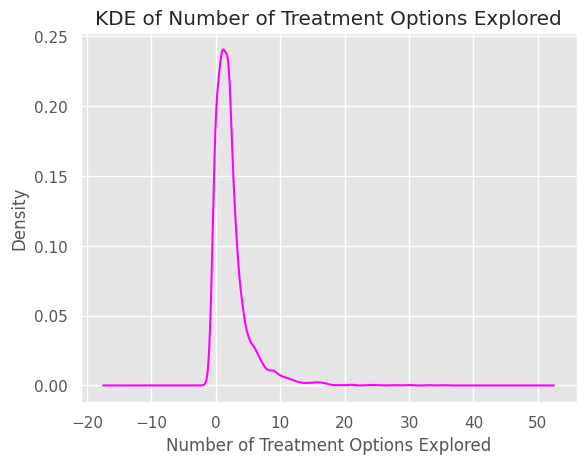

In [ ]:
# KDE (kernel density estimation)
df['Number of Educational Resources Viewed'].plot(kind='kde', color='magenta')
plt.title('KDE of Number of Treatment Options Explored')
plt.xlabel('Number of Treatment Options Explored')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Educational Resources Viewed'].skew()

3.4930843691486677

Text(0.5, 1.0, 'Box Plot of Number of Treatment Options Explored')

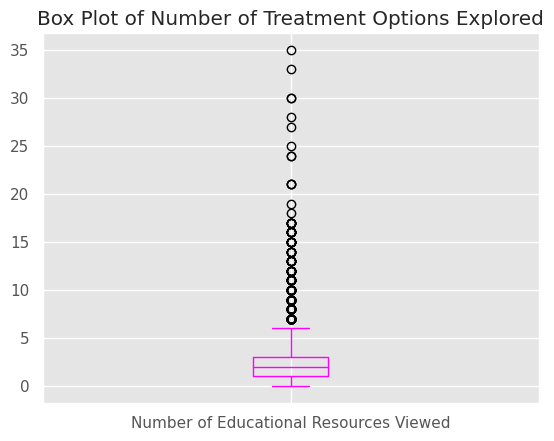

In [ ]:
# boxplot
df['Number of Educational Resources Viewed'].plot(kind='box', color='magenta')
plt.title('Box Plot of Number of Treatment Options Explored')

#### **Number of Times Logged Into Health Portal**

**Summary of analysis**


*   near to normal
*   median 0
*   maximum value 3



In [ ]:
df['Number of Times Logged Into Health Portal'].describe()

count    4284.000000
mean        0.169234
std         0.400299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Number of Times Logged Into Health Portal, dtype: float64

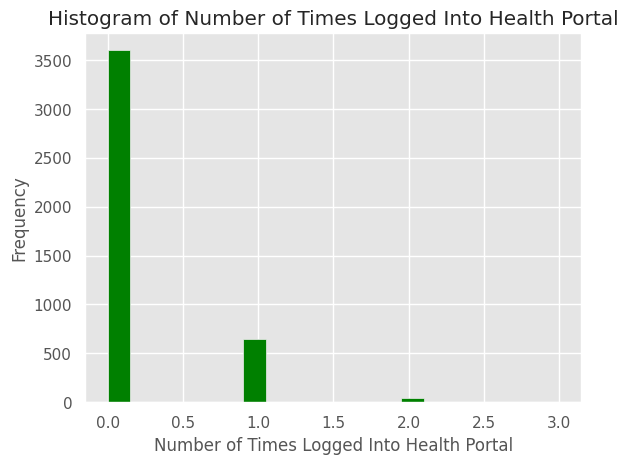

In [ ]:
df['Number of Times Logged Into Health Portal'].plot(kind='hist', bins= 20, color='green')
plt.title('Histogram of Number of Times Logged Into Health Portal')
plt.xlabel('Number of Times Logged Into Health Portal')
plt.ylabel('Frequency')
plt.show()

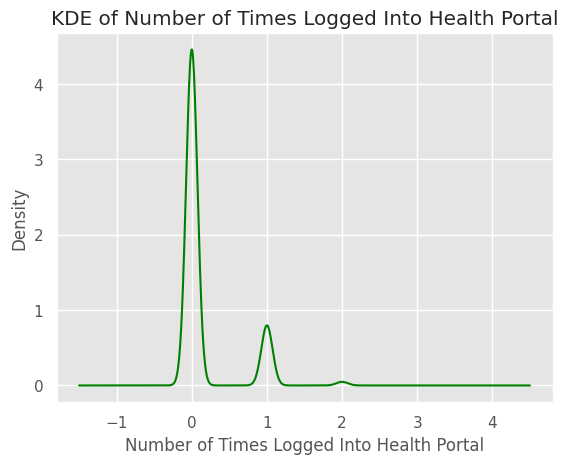

In [ ]:
#bar graph
df['Number of Times Logged Into Health Portal'].plot(kind='kde', color='green')
plt.title('KDE of Number of Times Logged Into Health Portal')
plt.xlabel('Number of Times Logged Into Health Portal')
plt.ylabel('Density')
plt.show()

In [ ]:
# checking the skewness
df['Number of Times Logged Into Health Portal'].skew()

2.235246811824483

Text(0.5, 1.0, 'Box Plot of Number of Times Logged Into Health Portal')

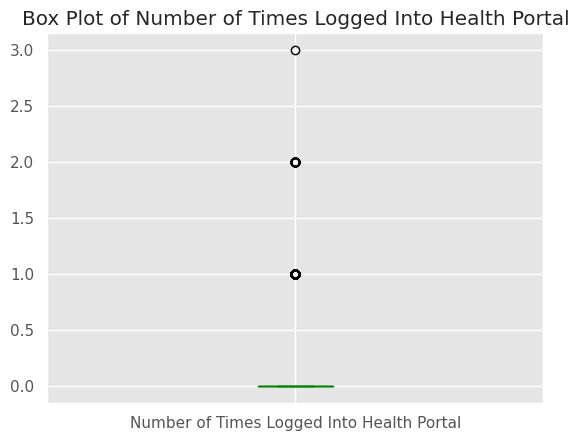

In [ ]:
# checking for outliers
df['Number of Times Logged Into Health Portal'].plot(kind='box', color='green')
plt.title('Box Plot of Number of Times Logged Into Health Portal')

#### **Categorical Variables**

#### **Initial Consultation Attended**

**Summary of analysis**


*   missing values 0
*   yes 28.2%
*   no  71.8%



In [ ]:
df['Initial Consultation Attended'].value_counts()

Initial Consultation Attended
No     3074
Yes    1210
Name: count, dtype: int64

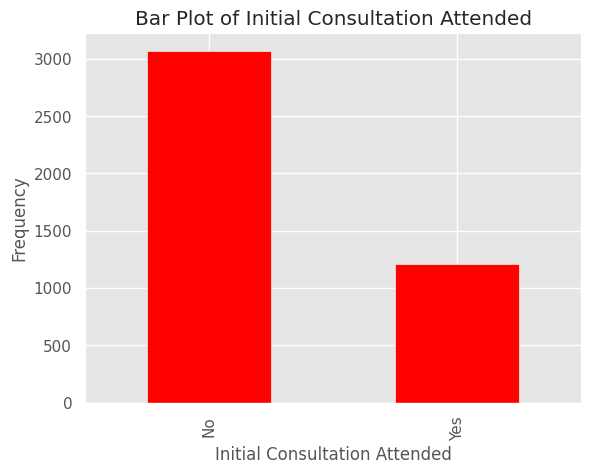

In [ ]:
#bar graph
df['Initial Consultation Attended'].value_counts().plot(kind='bar', color='red')
plt.title('Bar Plot of Initial Consultation Attended')
plt.xlabel('Initial Consultation Attended')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Pie Chart of Initial Consultation Attended')

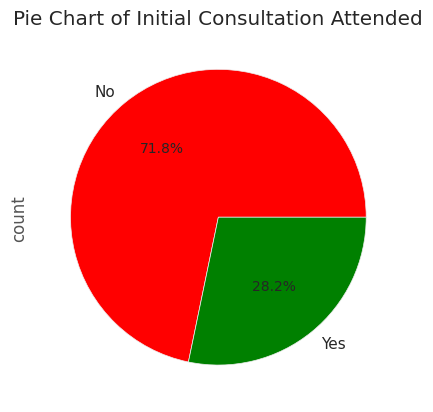

In [ ]:
# pie chart
df['Initial Consultation Attended'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Pie Chart of Initial Consultation Attended')


In [ ]:
# checking the missing values
df['Initial Consultation Attended'].isnull().sum()

0

#### **Patient Segment Type**

**Summary of analysis**


*   missing values 0
*   0 - 56.1%
*   1 - 31.4%
*   2 - 12.5%



In [ ]:
df['Patient Segment Type'].unique()

array([0, 1, 2])

In [ ]:
df['Patient Segment Type'].value_counts()

Patient Segment Type
0    2405
1    1345
2     534
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

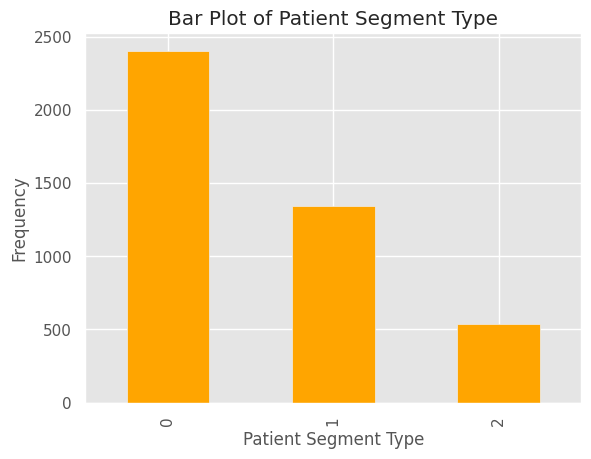

In [ ]:
#bar graph
df['Patient Segment Type'].value_counts().plot(kind='bar', color='orange')
plt.title('Bar Plot of Patient Segment Type')
plt.xlabel('Patient Segment Type')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Pie Chart of Patient Segment Type')

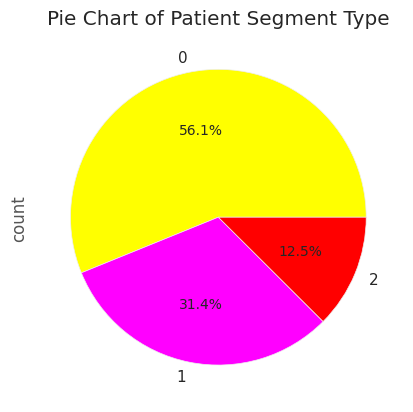

In [ ]:
# pie chart
df['Patient Segment Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'magenta', 'red'])
plt.title('Pie Chart of Patient Segment Type')


In [ ]:
# checking the missing values
df['Patient Segment Type'].isnull().sum()

0

#### **Treatment Dropped**

**Summary of analysis**


*   missing values 0
*   0 - 14.4%
*   1 - 85.6%



In [ ]:
df['Treatment Dropped'].unique()

array([1, 0])

In [ ]:
df['Treatment Dropped'].value_counts()

Treatment Dropped
1    3668
0     616
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

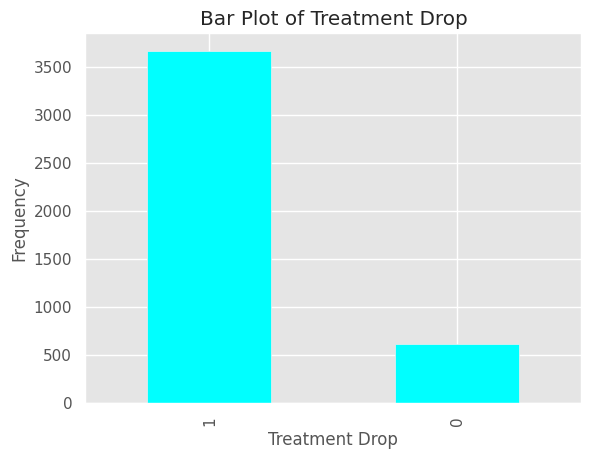

In [ ]:
#bar graph
df['Treatment Dropped'].value_counts().plot(kind='bar', color='cyan')
plt.title('Bar Plot of Treatment Drop')
plt.xlabel('Treatment Drop')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Pie Chart of Treatment Drop')

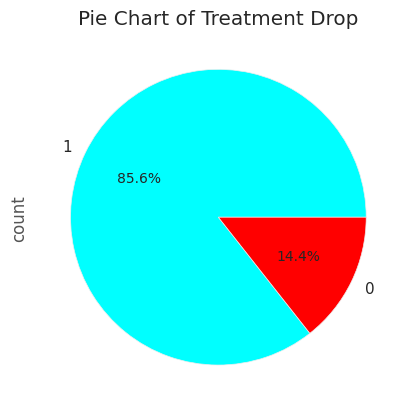

In [ ]:
# pie chart
df['Treatment Dropped'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'red'])
plt.title('Pie Chart of Treatment Drop')

In [ ]:
# checking the missing values
df['Patient Segment Type'].isnull().sum()

0

### **Bivariate Analysis**

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots. Scatterplots are not as much beneficial<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps


#### **First Type: Numerical-Numerical**

finding the relationship of one numerical column with all other numerical columns

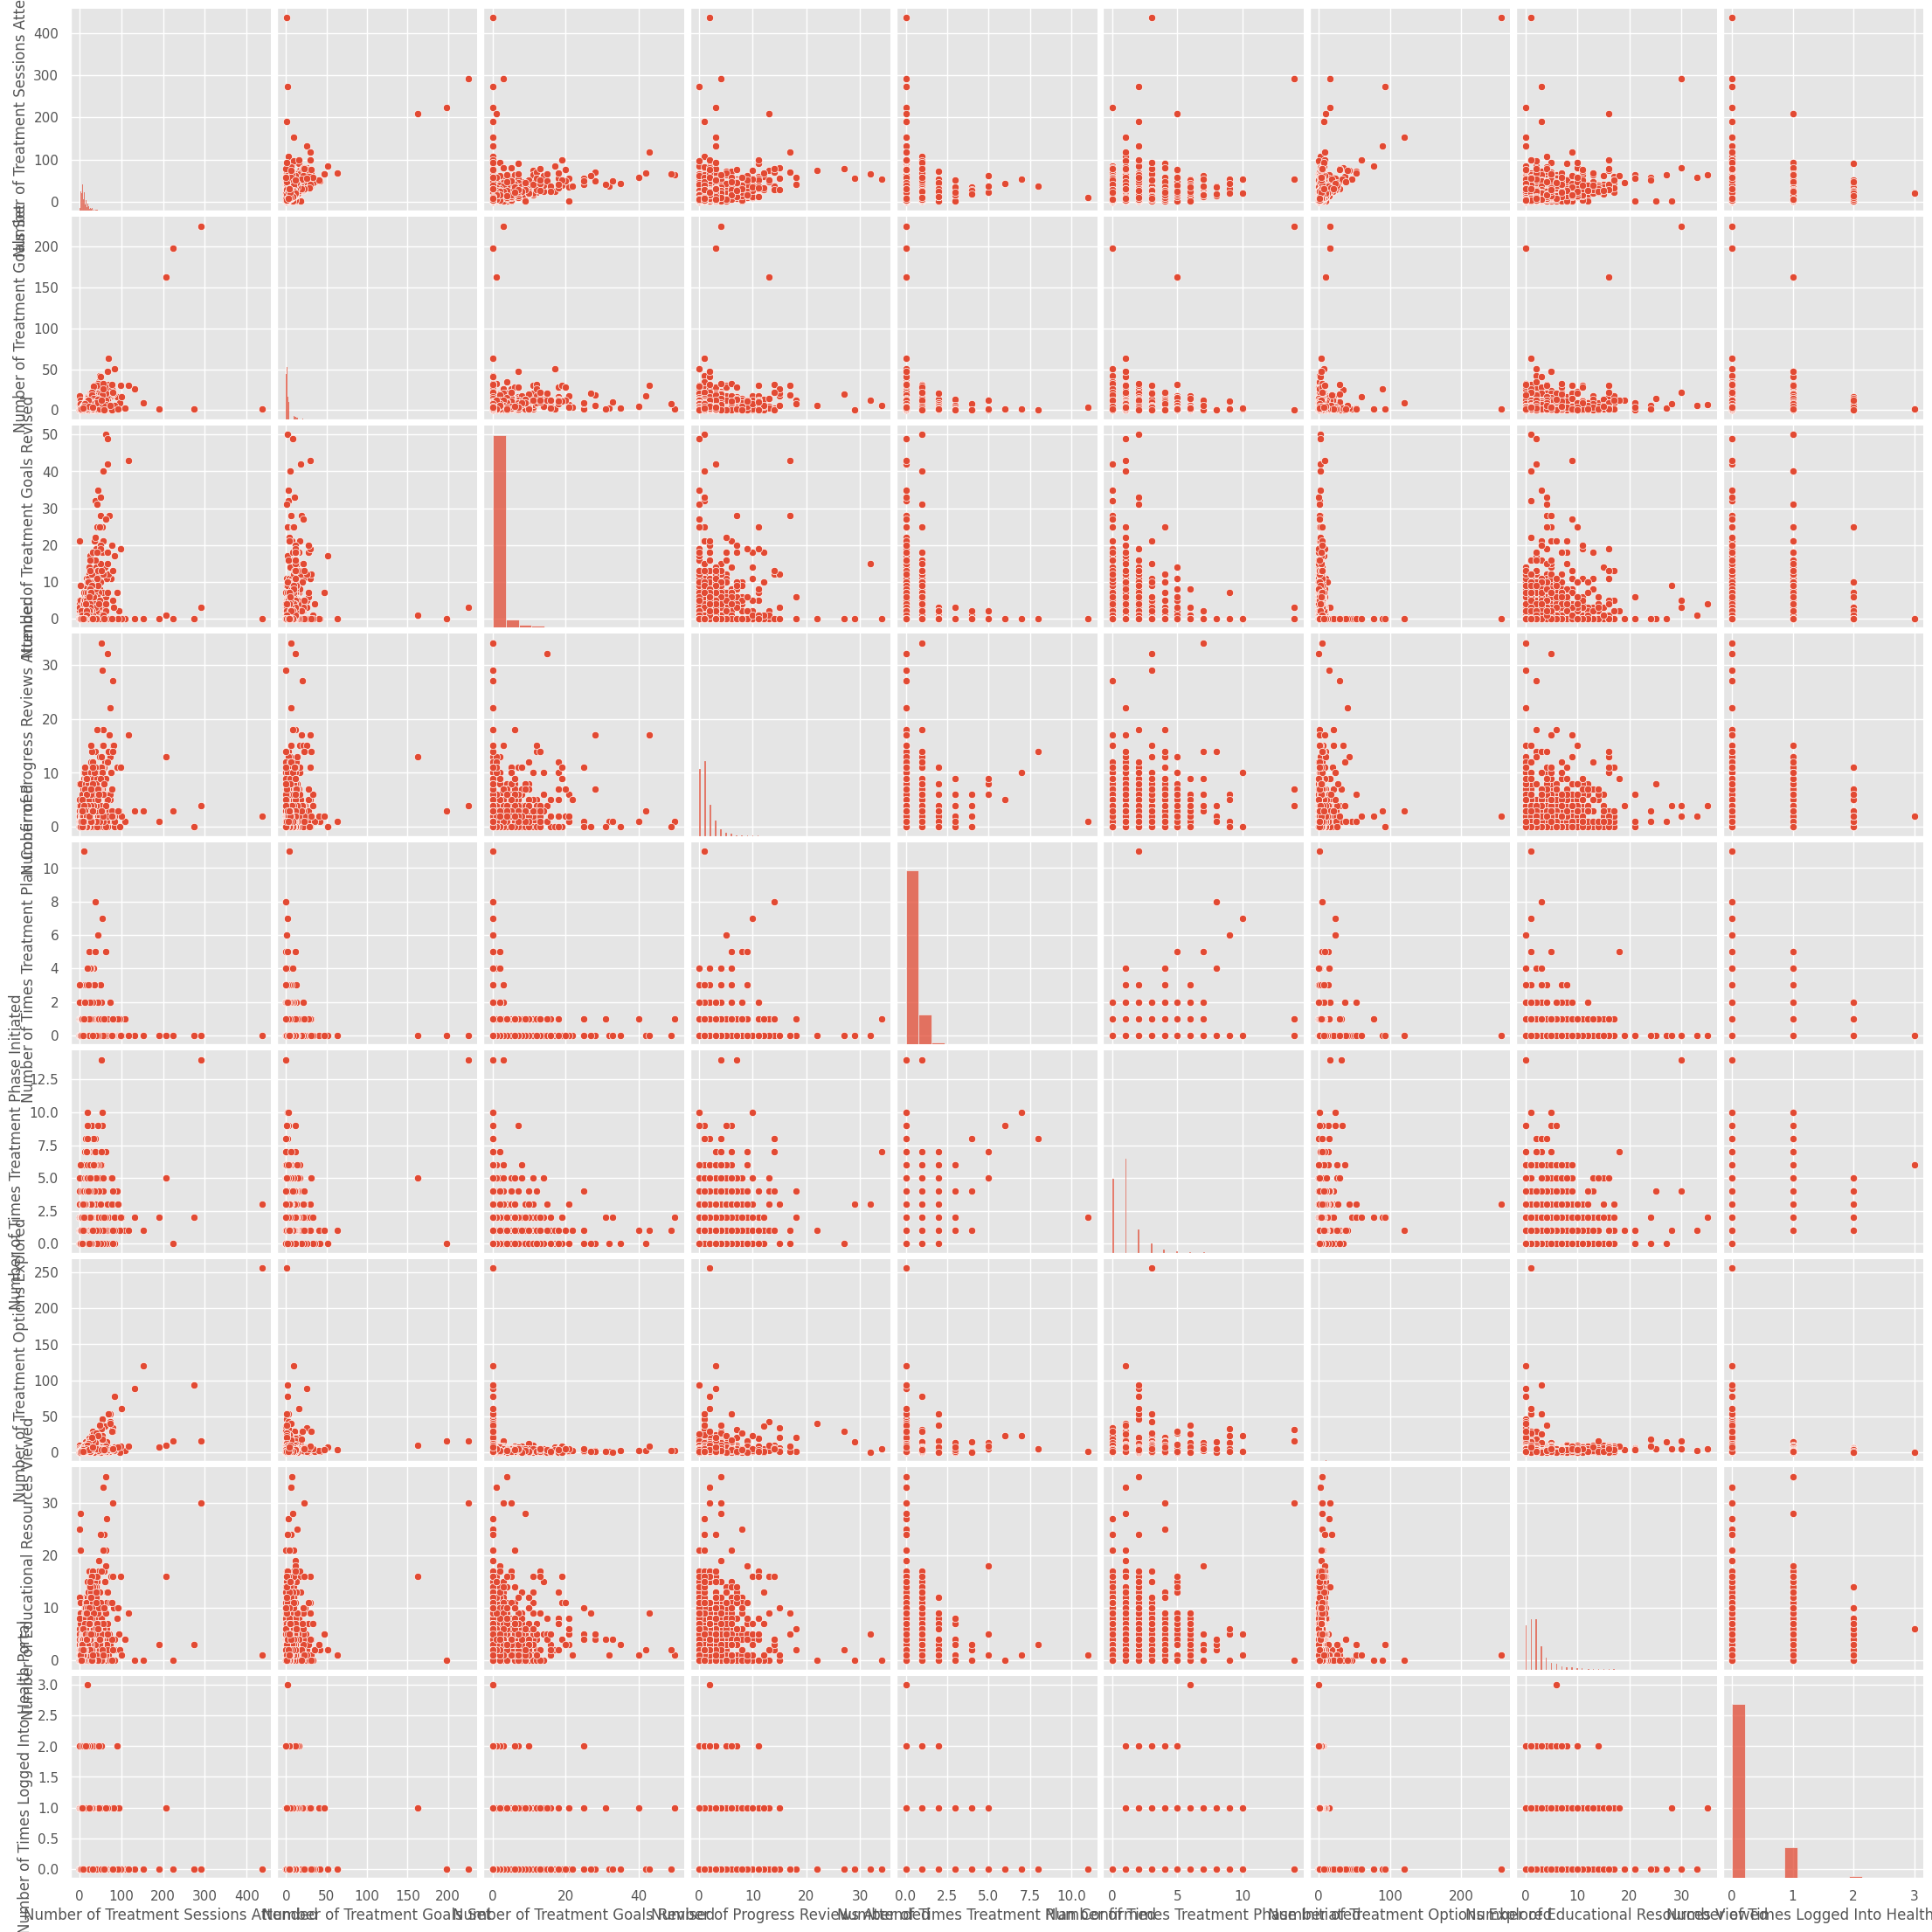

In [ ]:
numerical_cols = ['Number of Treatment Sessions Attended', 'Number of Treatment Goals Set',
                  'Number of Treatment Goals Revised', 'Number of Progress Reviews Attended',
                  'Number of Times Treatment Plan Confirmed', 'Number of Times Treatment Phase Initiated',
                  'Number of Treatment Options Explored', 'Number of Educational Resources Viewed',
                  'Number of Times Logged Into Health Portal']

sns.pairplot(df[numerical_cols])
plt.show()


#### **Second Type: Numerical-Categorical**

Relationship Between Initial Consultation Attended and all the numerical data columns

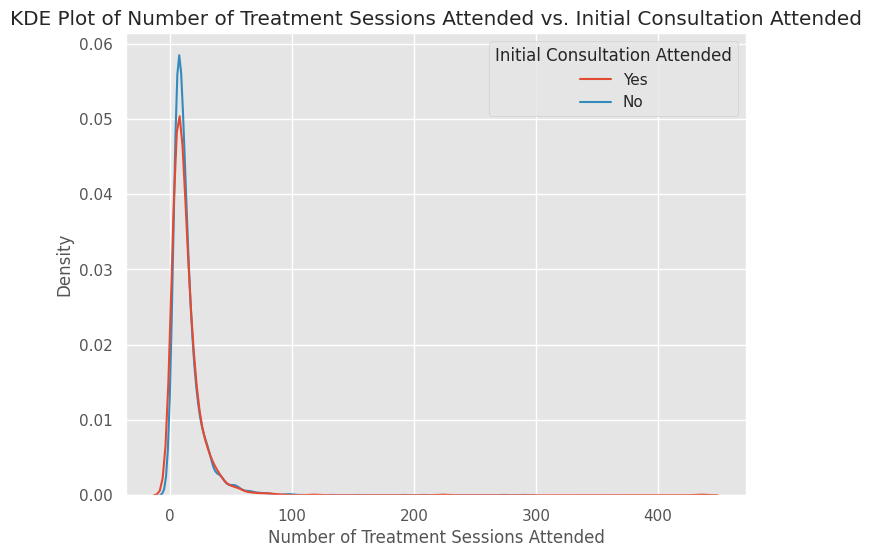

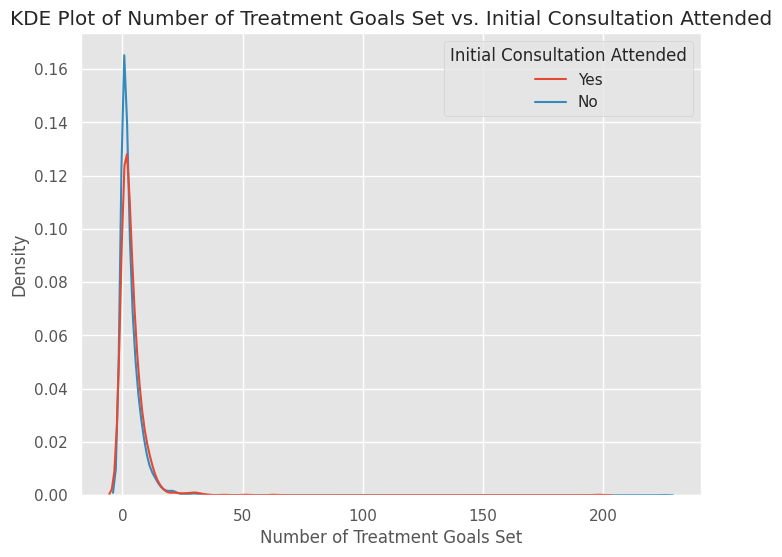

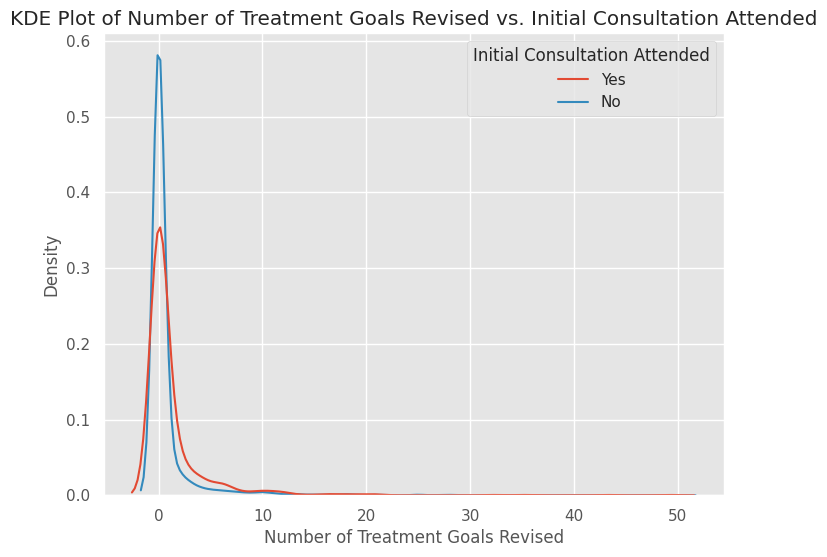

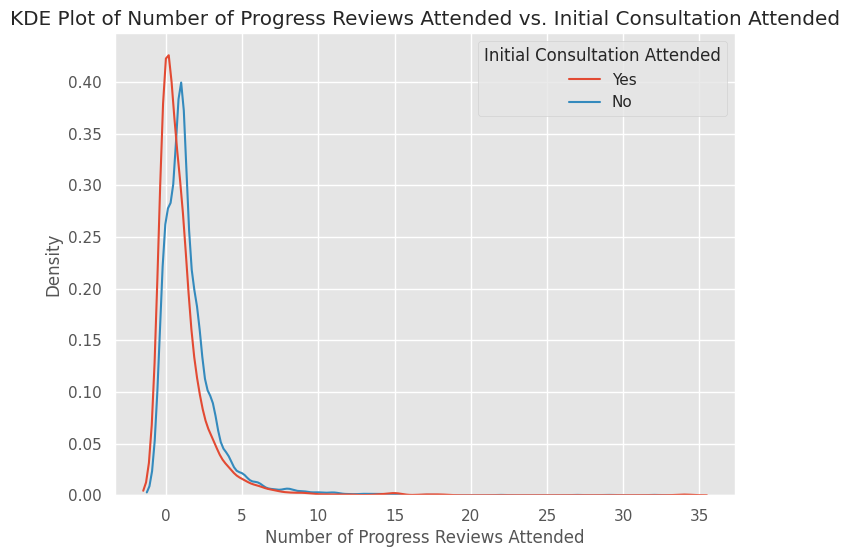

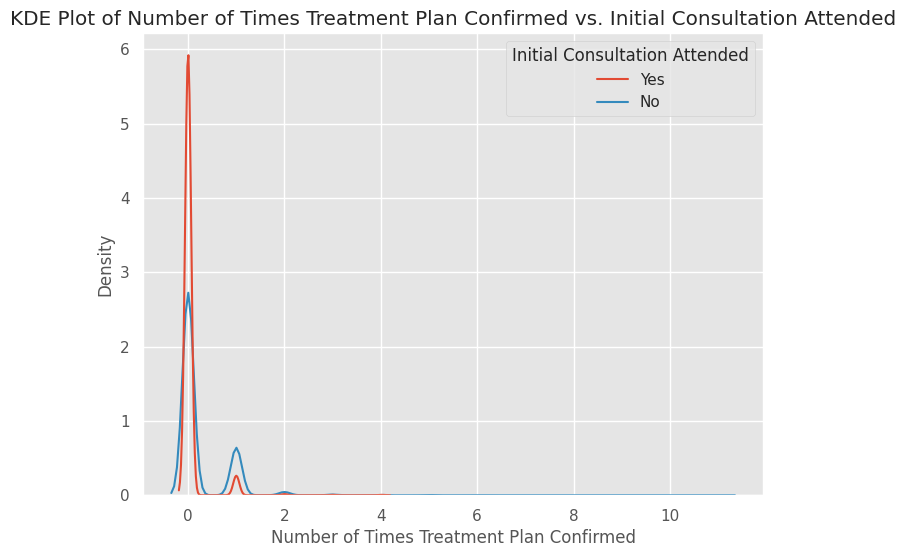

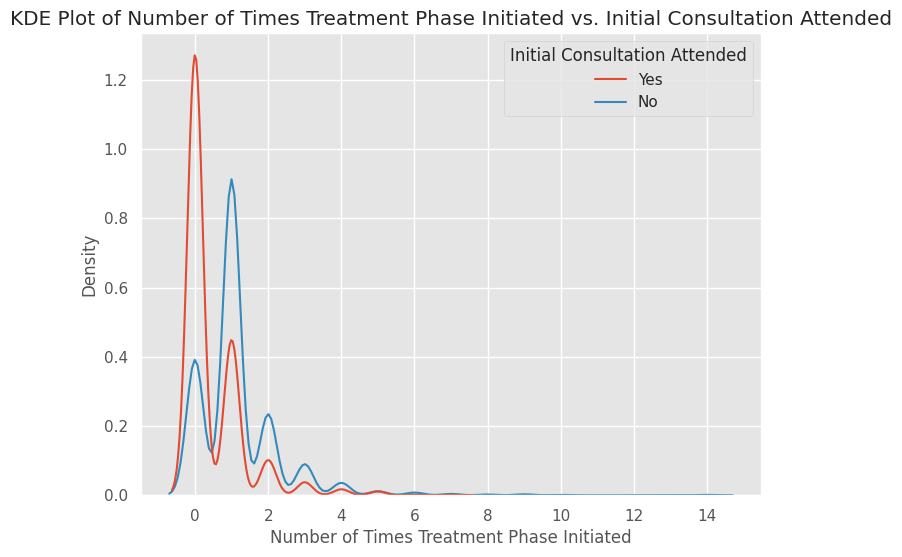

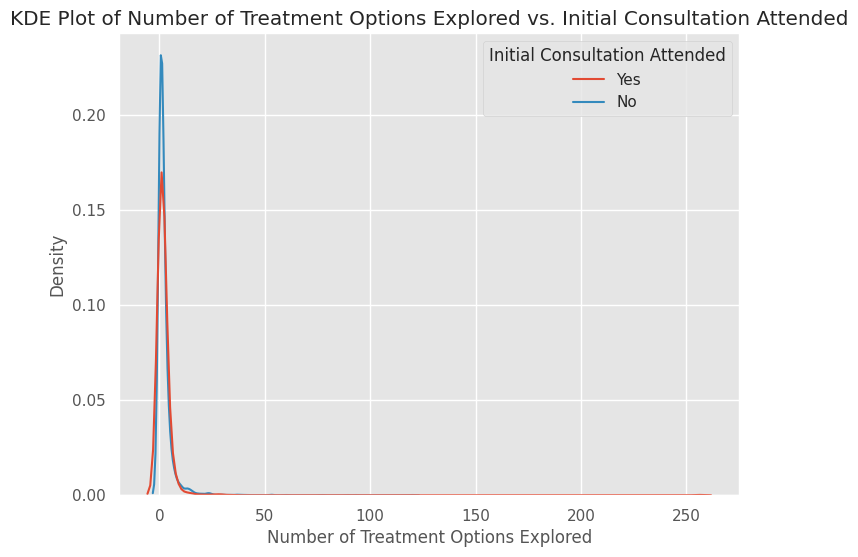

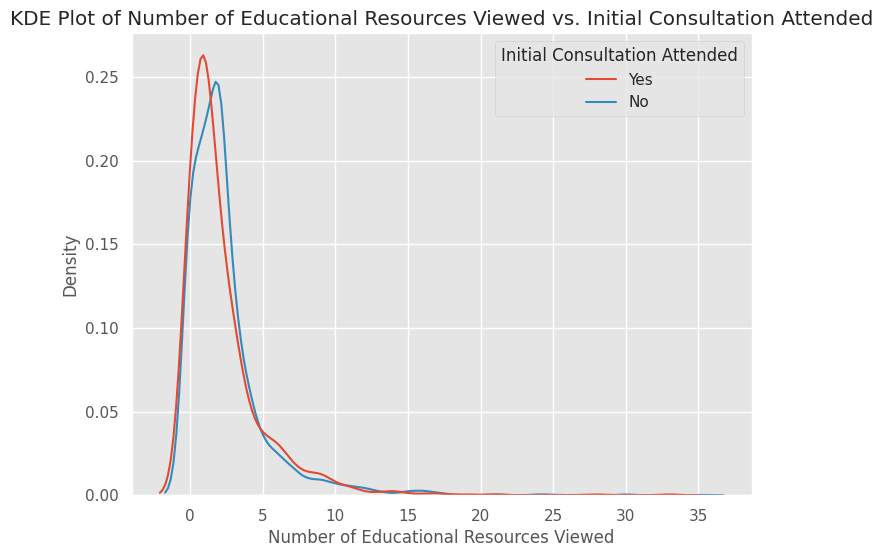

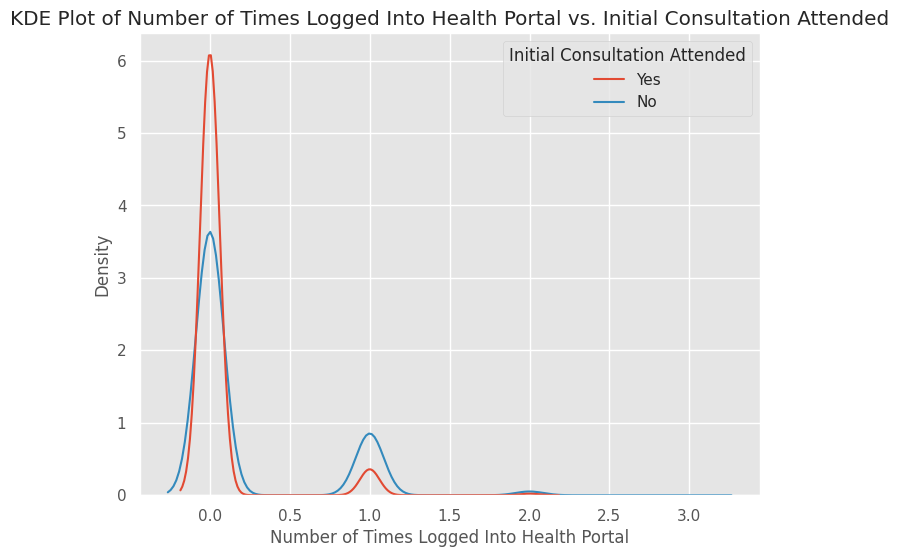

In [ ]:
numerical_columns = ['Number of Treatment Sessions Attended', 'Number of Treatment Goals Set',
                    'Number of Treatment Goals Revised', 'Number of Progress Reviews Attended',
                    'Number of Times Treatment Plan Confirmed', 'Number of Times Treatment Phase Initiated',
                    'Number of Treatment Options Explored', 'Number of Educational Resources Viewed',
                    'Number of Times Logged Into Health Portal']

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=df, x=column, hue='Initial Consultation Attended', common_norm=False)
  plt.title(f'KDE Plot of {column} vs. Initial Consultation Attended')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.show()


Relationship between Patient Segment Type and All numerical Columns

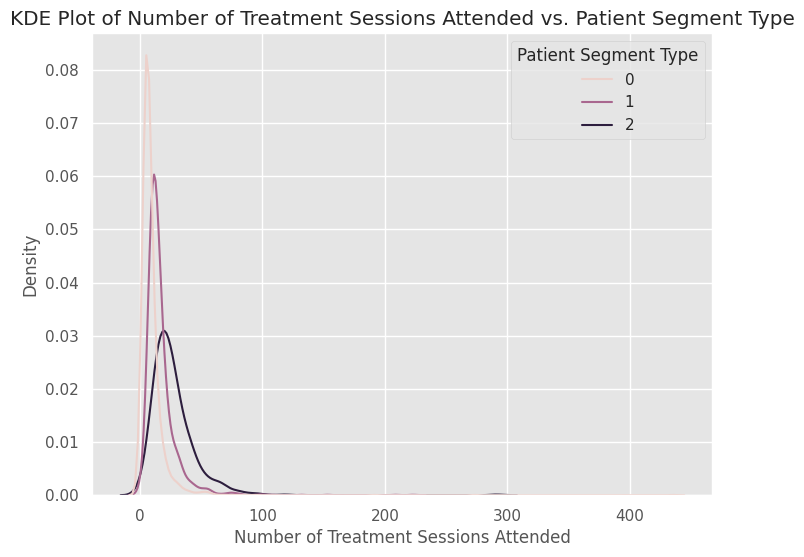

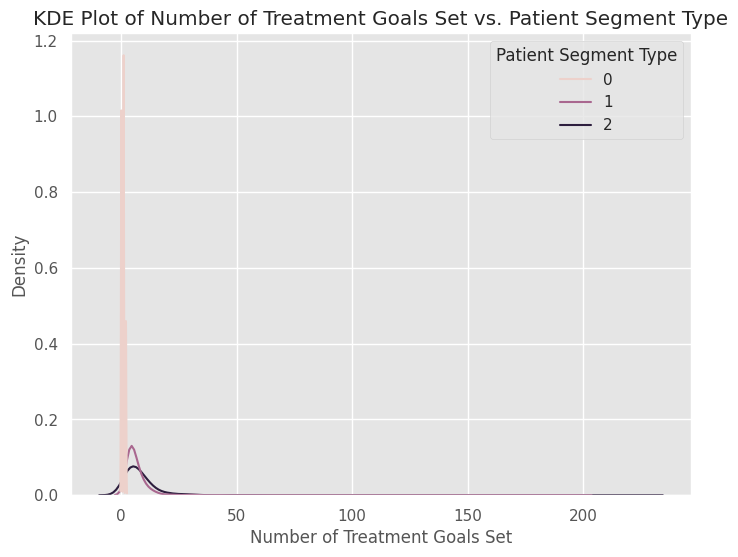

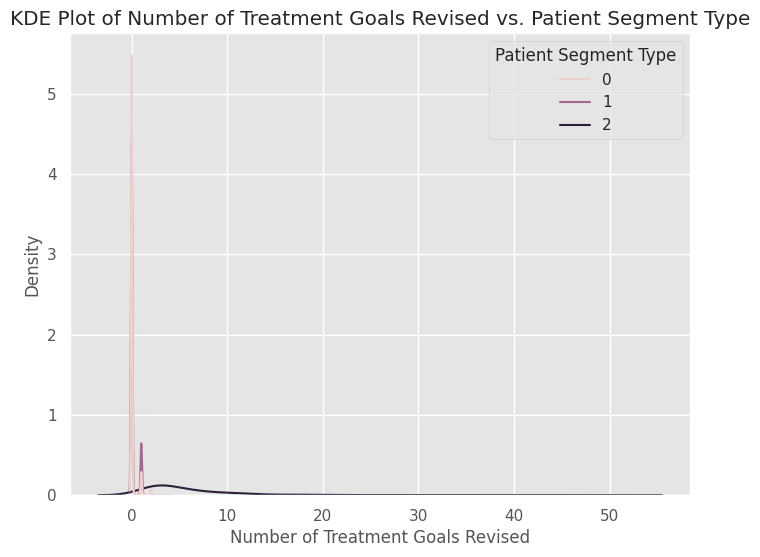

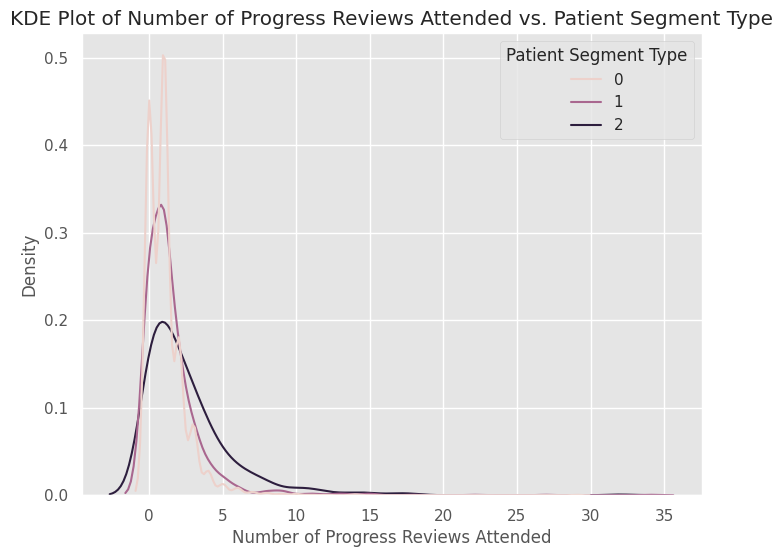

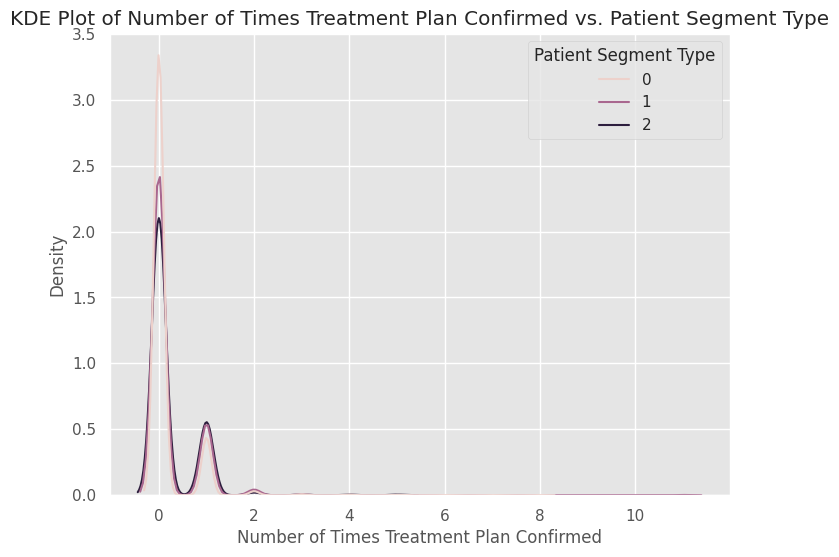

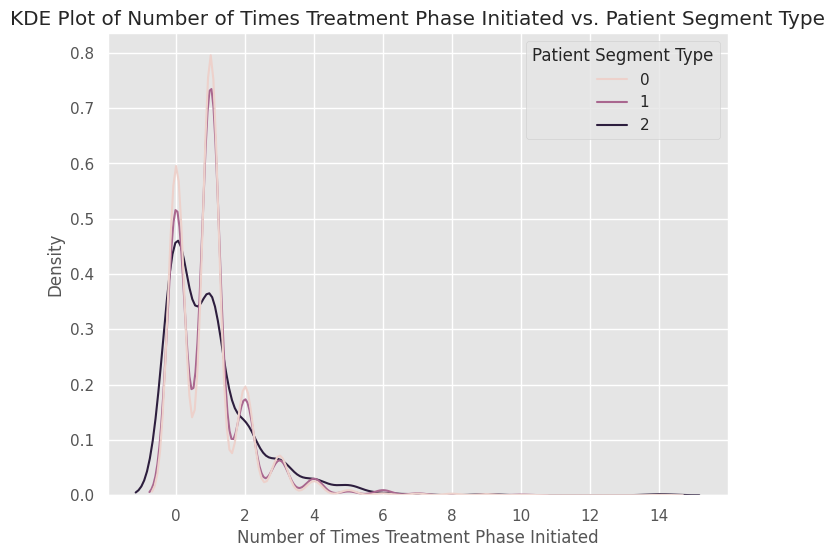

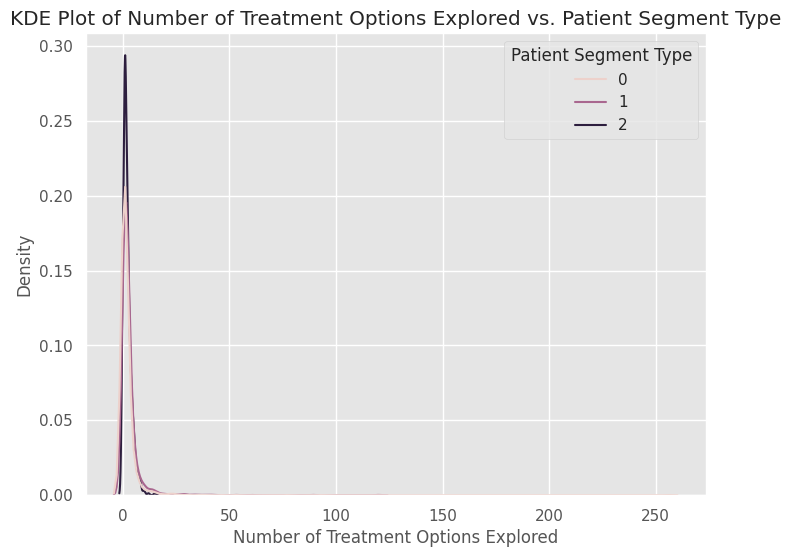

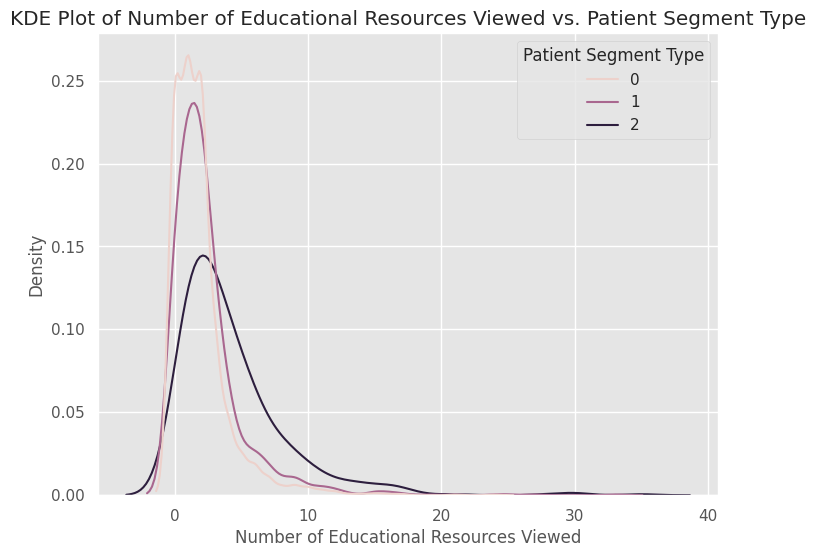

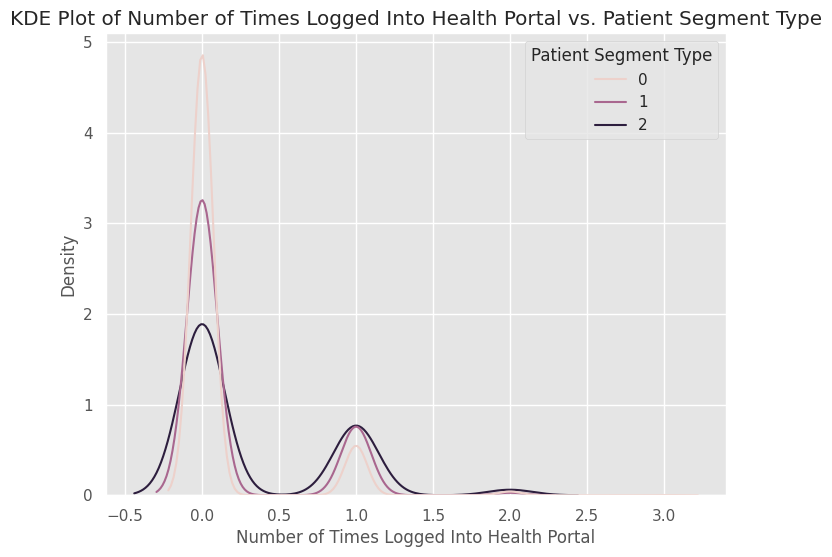

In [ ]:
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=df, x=column, hue='Patient Segment Type', common_norm=False)
  plt.title(f'KDE Plot of {column} vs. Patient Segment Type')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.show()


Relationship of treatment dropped with all numerical columns

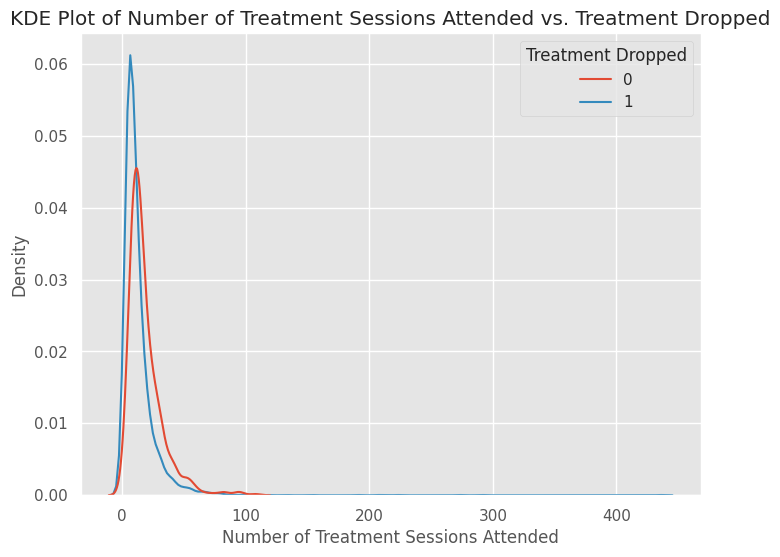

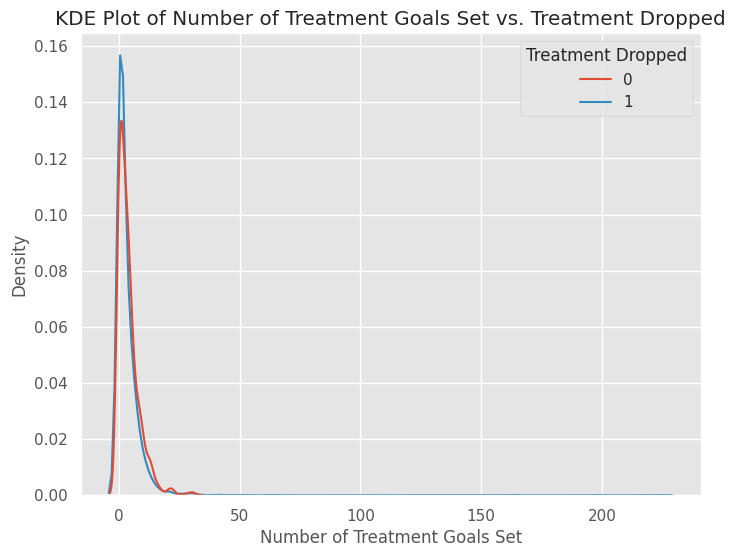

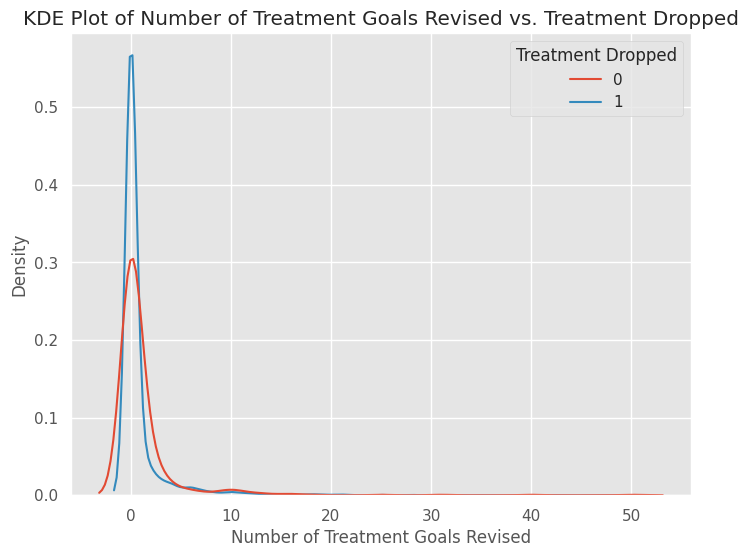

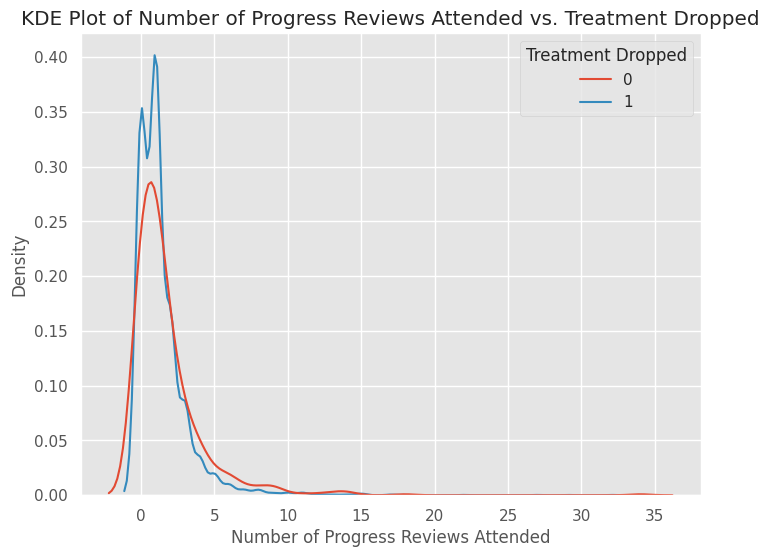

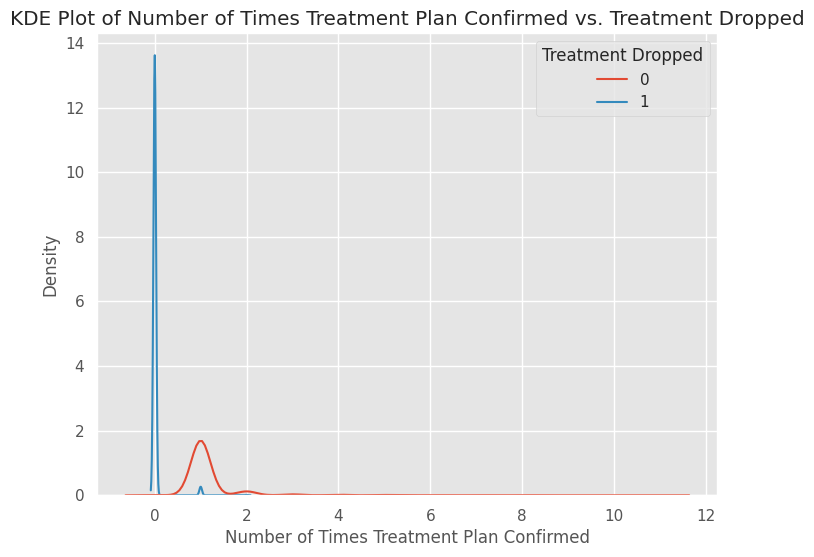

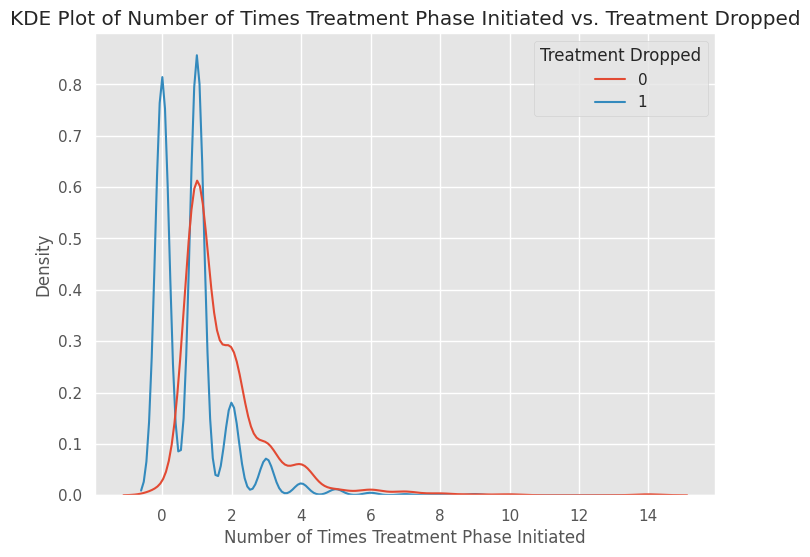

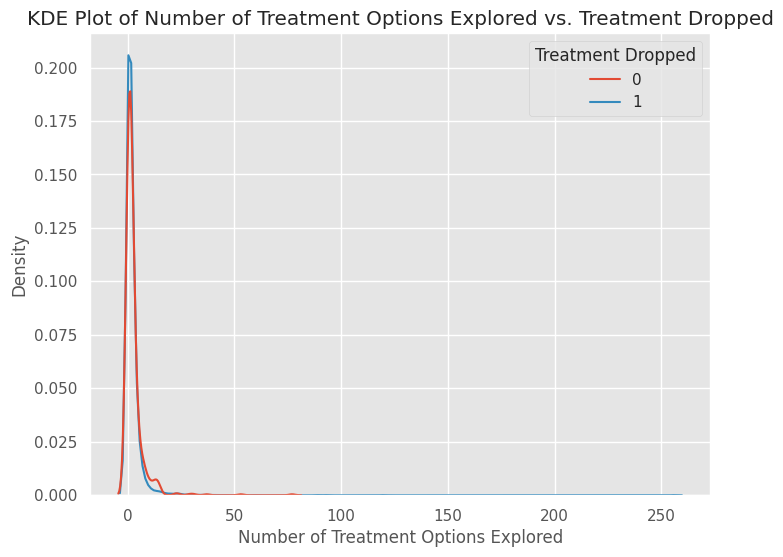

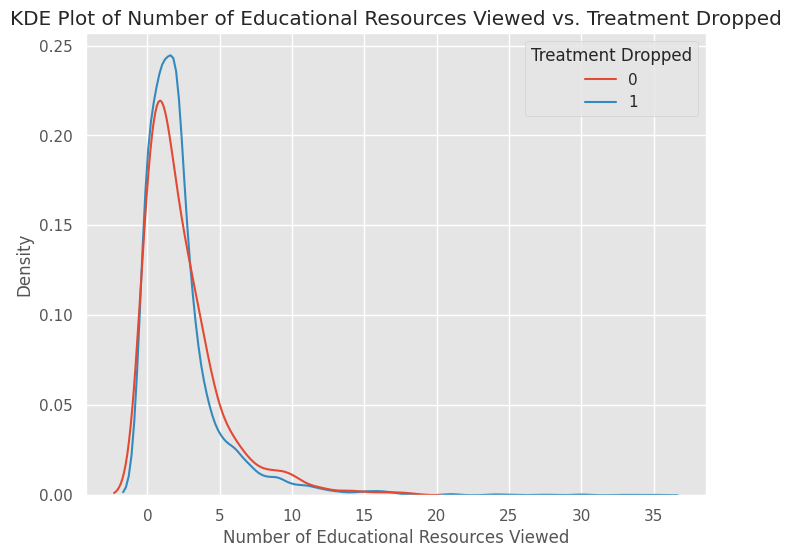

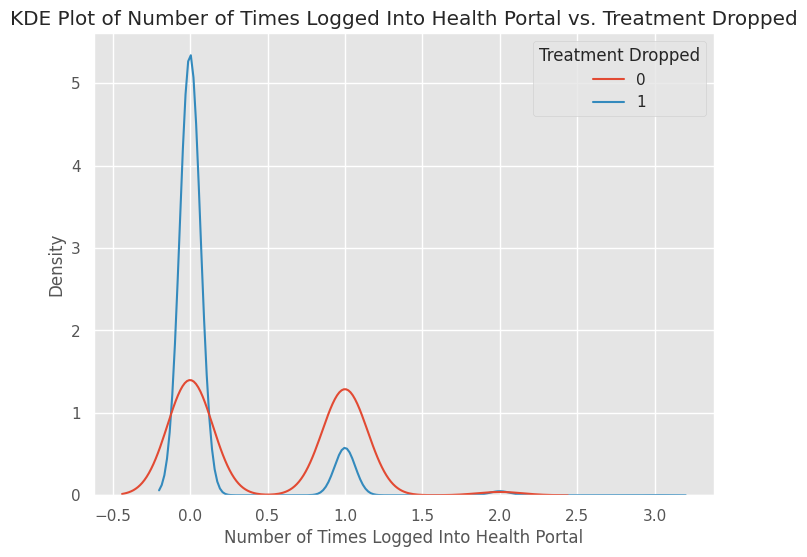

In [ ]:

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=df, x=column, hue='Treatment Dropped', common_norm=False)
  plt.title(f'KDE Plot of {column} vs. Treatment Dropped')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.show()


#### **Third Type: Categorical-Categoricals**

cross tab between treatment dropped and Initial Consultation Attended

In [ ]:
# cross tab between treatment dropped and Initial Consultation Attended
pd.crosstab(df['Treatment Dropped'], df['Initial Consultation Attended'])

Initial Consultation Attended    No   Yes
Treatment Dropped                        
0                               565    51
1                              2509  1159

In [ ]:
pd.crosstab(df['Treatment Dropped'], df['Initial Consultation Attended'], normalize='columns')*100

Initial Consultation Attended         No        Yes
Treatment Dropped                                  
0                              18.379961   4.214876
1                              81.620039  95.785124

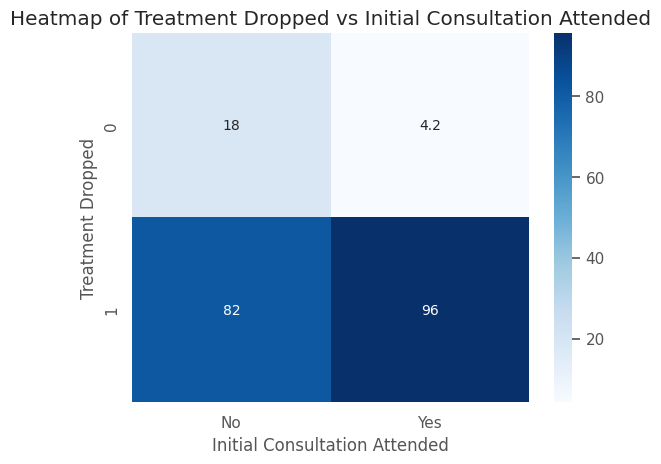

In [ ]:
sns.heatmap(pd.crosstab(df['Treatment Dropped'], df['Initial Consultation Attended'], normalize='columns')*100, annot=True, cmap='Blues')
plt.title('Heatmap of Treatment Dropped vs Initial Consultation Attended')
plt.show()

**Analysis:**

The majority of patients dropped the treatment, regardless of whether they attended the initial consultation.

However, those who attended the initial consultation were slightly more likely to drop the treatment (95.79%) compared to those who did not attend (81.62%).

cross tab between treatment dropped and Patient Segment Type

In [ ]:
#  cross tab between treatment dropped and Patient Segment Type
pd.crosstab(df['Treatment Dropped'], df['Patient Segment Type'])

Patient Segment Type     0     1    2
Treatment Dropped                    
0                      278   235  103
1                     2127  1110  431

In [ ]:
pd.crosstab(df['Treatment Dropped'], df['Patient Segment Type'], normalize='columns')*100

Patient Segment Type          0          1         2
Treatment Dropped                                   
0                     11.559252  17.472119  19.28839
1                     88.440748  82.527881  80.71161

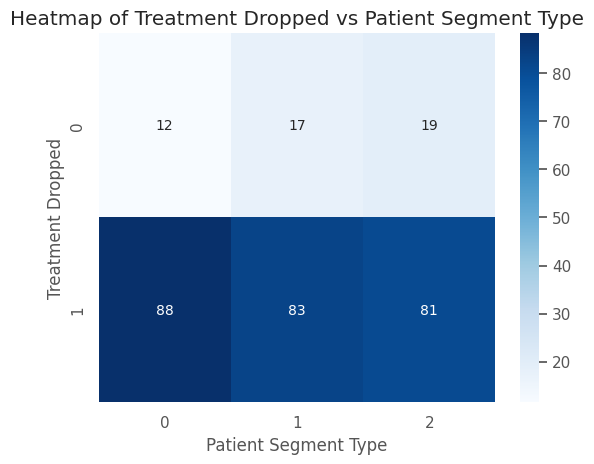

In [ ]:
# heatmap
sns.heatmap(pd.crosstab(df['Treatment Dropped'], df['Patient Segment Type'], normalize='columns')*100, annot=True, cmap='Blues')
plt.title('Heatmap of Treatment Dropped vs Patient Segment Type')
plt.show()

cross tab of Initial Consultation Attended with Patient Segment Type

In [ ]:

pd.crosstab(df['Initial Consultation Attended'], df['Patient Segment Type'])


Patient Segment Type              0    1    2
Initial Consultation Attended                
No                             1795  966  313
Yes                             610  379  221

In [ ]:

pd.crosstab(df['Initial Consultation Attended'], df['Patient Segment Type'], normalize='columns')*100

Patient Segment Type                   0          1          2
Initial Consultation Attended                                 
No                             74.636175  71.821561  58.614232
Yes                            25.363825  28.178439  41.385768

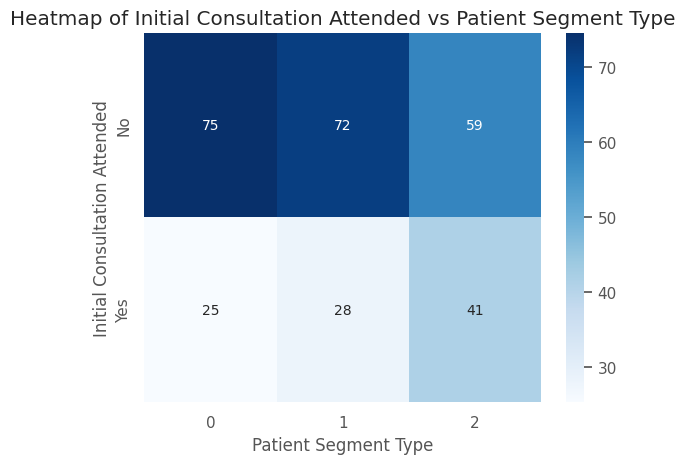

In [ ]:
sns.heatmap(pd.crosstab(df['Initial Consultation Attended'], df['Patient Segment Type'], normalize='columns')*100, annot=True, cmap='Blues')
plt.title('Heatmap of Initial Consultation Attended vs Patient Segment Type')
plt.show()

## By Univariate and Bivariate Analysis, now we have a good idea about the features and their importance.

## **2.1 Handling Missing Data And Duplicated Data**

In [ ]:
df.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                9
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          9
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

In [ ]:
#the rows with missing values ofNumber of Treatment Goals Set
rows_with_missing_goals = df[df['Number of Treatment Goals Set'].isnull()]
rows_with_missing_goals

Patient ID Initial Consultation Attended  \
11      ID_11                            No   
12      ID_12                            No   
13      ID_13                           Yes   
14      ID_14                            No   
15      ID_15                            No   
16      ID_16                           Yes   
17      ID_17                           Yes   
18      ID_18                            No   
19      ID_19                            No   

    Number of Treatment Sessions Attended  Number of Treatment Goals Set  \
11                                      8                            NaN   
12                                      9                            NaN   
13                                      8                            NaN   
14                                      3                            NaN   
15                                     31                            NaN   
16                                      6                            NaN   
17                                      7                            NaN   
18                                     35                            NaN   
19                                      8                            NaN   

    Number of Treatment Goals Revised  Number of Progress Reviews Attended  \
11                                  0                                  NaN   
12                                  0                                  NaN   
13                                  0                                  NaN   
14                                  0                                  NaN   
15                                  0                                  NaN   
16                                  1                                  0.0   
17                                  0                                  2.0   
18                                  8                                  6.0   
19                                  0                                  0.0   

    Number of Times Treatment Plan Confirmed  \
11                                         0   
12                                         0   
13                                         0   
14                                         0   
15                                         0   
16                                         0   
17                                         0   
18                                         0   
19                                         0   

    Number of Times Treatment Phase Initiated  \
11                                          2   
12                                          1   
13                                          1   
14                                          1   
15                                          7   
16                                          0   
17                                          1   
18                                          2   
19                                          0   

    Number of Treatment Options Explored  \
11                                     1   
12                                     4   
13                                     2   
14                                     2   
15                                    13   
16                                     1   
17                                     3   
18                                     1   
19                                     2   

    Number of Times Logged Into Health Portal  \
11                                          0   
12                                          0   
13                                          0   
14                                          0   
15                                          0   
16                                          0   
17                                          0   
18                                          1   
19                                          0   

    Number of Educational Resources Viewed  Patient Segment Type  \
11                

In [ ]:
#the rows with missing values of Number of Progress Reviews Attended
rows_with_missing_progress_reviews = df[df['Number of Progress Reviews Attended'].isnull()]
rows_with_missing_progress_reviews


Patient ID Initial Consultation Attended  \
7        ID_7                            No   
8        ID_8                            No   
9        ID_9                            No   
10      ID_10                            No   
11      ID_11                            No   
12      ID_12                            No   
13      ID_13                           Yes   
14      ID_14                            No   
15      ID_15                            No   

    Number of Treatment Sessions Attended  Number of Treatment Goals Set  \
7                                       7                            1.0   
8                                      13                            8.0   
9                                      17                            4.0   
10                                     20                            5.0   
11                                      8                            NaN   
12                                      9                            NaN   
13                                      8                            NaN   
14                                      3                            NaN   
15                                     31                            NaN   

    Number of Treatment Goals Revised  Number of Progress Reviews Attended  \
7                                   0                                  NaN   
8                                   1                                  NaN   
9                                   1                                  NaN   
10                                 10                                  NaN   
11                                  0                                  NaN   
12                                  0                                  NaN   
13                                  0                                  NaN   
14                                  0                                  NaN   
15                                  0                                  NaN   

    Number of Times Treatment Plan Confirmed  \
7                                          0   
8                                          0   
9                                          1   
10                                         0   
11                                         0   
12                                         0   
13                                         0   
14                                         0   
15                                         0   

    Number of Times Treatment Phase Initiated  \
7                                           1   
8                                           0   
9                                           2   
10                                          0   
11                                          2   
12                                          1   
13                                          1   
14                                          1   
15                                          7   

    Number of Treatment Options Explored  \
7                                      1   
8                                      1   
9                                      2   
10                                     1   
11                                     1   
12                                     4   
13                                     2   
14                                     2   
15                                    13   

    Number of Times Logged Into Health Portal  \
7                                           0   
8                                           0   
9                                           1   
10                                          0   
11                                          0   
12                                          0   
13                                          0   
14                                          0   
15                                          0   

    Number of Educational Resources Viewed  Patient Segment Type  \
7                 

As in both columns with missing values, there are five such rows in which the values of both features are missing. So if I drop the rows with null values then total 14 rows will be dropped from the dataset.

In [ ]:
# percentage of rows with null values
total_rows = len(df)
rows_with_null_values = df.isnull().any(axis=1).sum()
percentage_of_nulls = (rows_with_null_values / total_rows)*100

percentage_of_nulls

0.30345471521942113

Only 0.3% of the data contains the null values so decided to drop that rows

In [ ]:
# before dropping
df.shape

(4284, 13)

In [ ]:
# dropping the null values rows
df.dropna(inplace=True)

In [ ]:
# after dropping
df.shape

(4271, 13)

In [ ]:
# again checking for the null values for varification
df.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                0
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          0
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

dropping the patient id column

In [ ]:
df.drop('Patient ID', axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

965

In [ ]:
df[df.duplicated()]


Initial Consultation Attended  Number of Treatment Sessions Attended  \
41                              No                                      5   
47                              No                                      5   
49                              No                                      5   
61                              No                                      6   
112                             No                                      1   
...                            ...                                    ...   
4272                            No                                     13   
4276                            No                                     10   
4277                           Yes                                      3   
4281                            No                                      4   
4282                            No                                      8   

      Number of Treatment Goals Set  Number of Treatment Goals Revised  \
41                              1.0                                  0   
47                              1.0                                  0   
49                              1.0                                  0   
61                              1.0                                  0   
112                             0.0                                  0   
...                             ...                                ...   
4272                            8.0                                  0   
4276                            5.0                                  0   
4277                            1.0                                  0   
4281                            1.0                                  0   
4282                            3.0                                  0   

      Number of Progress Reviews Attended  \
41                                    1.0   
47                                    1.0   
49                                    1.0   
61                                    2.0   
112                                   1.0   
...                                   ...   
4272                                  1.0   
4276                                  1.0   
4277                                  0.0   
4281                                  1.0   
4282                                  1.0   

      Number of Times Treatment Plan Confirmed  \
41                                           0   
47                                           0   
49                                           0   
61                                           0   
112                                          0   
...                                        ...   
4272                                         0   
4276                                         0   
4277                                         0   
4281                                         0   
4282                                         0   

      Number of Times Treatment Phase Initiated  \
41                                            1   
47                                            1   
49                                            1   
61                                            1   
112                                           0   
...                                         ...   
4272                                          1   
4276                                          1   
4277                                          0   
4281                                          1   
4282                                          1   

      Number of Treatment Options Explored  \
41                                       0   
47                                       0   
49                                       0   
61                                       0   
112                                      0   
...                                    ...   
4272                                     1   
4276                                     1   
4277                  

In [ ]:
df.shape

(4271, 12)

In [ ]:
# drop the duplicated values but keep the first instance

df.drop_duplicates(keep= 'first' , inplace=True)


In [ ]:
df.shape

(3306, 12)

In [ ]:
df.duplicated().sum()

0

## **2.2 Feature Scaling**

Feature Scaling is an important step because it is evident in the univariate analysis that most of the features contains alot of outliers but those outliers are present in clusters form. They will definetely play a significant role in predicting outcome. Feature Scaling will help us to cope up with this problem to some extent.

Now here I have to choose either standarization or normalization.
For logistic regression, standardization (Z-score normalization) is often the best choice because it centers the data around the mean and gives each feature a consistent influence on the model, regardless of the original scale.

### Scaling Numerical Columns Using Standardization

In [ ]:
# Select the numerical features to be standardized
numerical_features = ['Number of Treatment Sessions Attended', 'Number of Treatment Goals Set',
                      'Number of Treatment Goals Revised', 'Number of Progress Reviews Attended',
                      'Number of Times Treatment Plan Confirmed', 'Number of Times Treatment Phase Initiated',
                      'Number of Treatment Options Explored', 'Number of Educational Resources Viewed',
                      'Number of Times Logged Into Health Portal']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## **2.3 Encoding Categorical Variables**

logistic regression requires numerical input. So here converting the categorical columns into numerical. First lets check which type of categorical variables are there in the dataset

1. Initial Consultation Attended
2. Patient Segment Type
3. Treatment Dropped

In [ ]:
df['Initial Consultation Attended'].unique()


array(['Yes', 'No'], dtype=object)

In [ ]:
# the number of times yes and no are there in the dataset
yes_count = df['Initial Consultation Attended'].value_counts().get('Yes', 0)
no_count = df['Initial Consultation Attended'].value_counts().get('No', 0)

print(f"Number of 'Yes': {yes_count}")
print(f"Number of 'No': {no_count}")


Number of 'Yes': 990
Number of 'No': 2316


In [ ]:
df['Patient Segment Type'].unique()

array([0, 1, 2])

In [ ]:
df['Treatment Dropped'].unique()

array([1, 0])

Patient Segment Type is ordinal and already numerical form 0 (low-risk), 1(medium-risk) and 2(high-risk)

Treatment Dropped is already in binary form (0 for not dropped and 1 for dropped)

Initial Consultation Attended is in Yes and NO form and requires label encoding

Reason of using label encoding for Initial Consultation Attended is that here i just want to say yes as 1 and no as 0. If I do one hot encoding here, then it will create two columns one for 1 and one for 0. one hot encoding would be redundant in this case.


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Initial Consultation Attended' column
df['Initial Consultation Attended'] = label_encoder.fit_transform(df['Initial Consultation Attended'])


after encoding

In [ ]:
df['Initial Consultation Attended'].unique()

array([1, 0])

In [ ]:
# the number of times yes and no are there in the dataset
yes_count = df['Initial Consultation Attended'].value_counts().get(1, 0)
no_count = df['Initial Consultation Attended'].value_counts().get(0, 0)

print(f"Number of 'Yes': {yes_count}")
print(f"Number of 'No': {no_count}")


Number of 'Yes': 990
Number of 'No': 2316


## **2.4 Outlier Detection**




 it is evident in the univariate analysis that most of the features contains alot of outliers but those outliers are present in clusters form. They will definetely play a significant role in predicting outcome.

 Strategy for outliers
 here a threshold for the outliers will be defined for filtering them out of the data. The Boxplots in the univariate analysis have given fair enough idea about the outliers.

In [ ]:
df.describe()

Initial Consultation Attended  Number of Treatment Sessions Attended  \
count                    3306.000000                           3.306000e+03   
mean                        0.299456                          -8.597008e-18   
std                         0.458089                           1.000151e+00   
min                         0.000000                          -9.463036e-01   
25%                         0.000000                          -4.838186e-01   
50%                         0.000000                          -2.525761e-01   
75%                         1.000000                           1.520982e-01   
max                         1.000000                           2.425913e+01   

       Number of Treatment Goals Set  Number of Treatment Goals Revised  \
count                   3.306000e+03                       3.306000e+03   
mean                   -9.402978e-18                       4.083579e-17   
std                     1.000151e+00                       1.000151e+00   
min                    -5.483765e-01                      -3.220243e-01   
25%                    -4.158425e-01                      -3.220243e-01   
50%                    -1.507745e-01                      -3.220243e-01   
75%                     2.468276e-01                      -3.201821e-02   
max                     2.927178e+01                       1.417828e+01   

       Number of Progress Reviews Attended  \
count                         3.306000e+03   
mean                          6.662681e-17   
std                           1.000151e+00   
min                          -7.037699e-01   
25%                          -7.037699e-01   
50%                          -2.699337e-01   
75%                           1.639024e-01   
max                           1.404666e+01   

       Number of Times Treatment Plan Confirmed  \
count                              3.306000e+03   
mean                               8.597008e-18   
std                                1.000151e+00   
min                               -4.092417e-01   
25%                               -4.092417e-01   
50%                               -4.092417e-01   
75%                               -4.092417e-01   
max                                1.874453e+01   

       Number of Times Treatment Phase Initiated  \
count                               3.306000e+03   
mean                                8.597008e-18   
std                                 1.000151e+00   
min                                -8.426825e-01   
25%                                -8.426825e-01   
50%                                -4.305324e-02   
75%                                -4.305324e-02   
max                                 1.035213e+01   

       Number of Treatment Options Explored  \
count                          3.306000e+03   
mean                          -1.719402e-17   
std                            1.000151e+00   
min                           -4.016350e-01   
25%                           -2.547214e-01   
50%                           -2.547214e-01   
75%                            3.910587e-02   
max                            3.720825e+01   

       Number of Times Logged Into Health Portal  \
count                               3.306000e+03   
mean                                4.298504e-18   
std                                 1.000151e+00   
min                                -4.738627e-01   
25%                                -4.738627e-01   
50%                                -4.738627e-01   
75%                                -4.738627e-01   
max                                 6.427415e+00   

       Number of Educational Resources Viewed  Patient Segment Type  \
count                            3.306000e+03           3306.000000   
mean                             3.653729e-17              0.686328   
std                              1.000151e+00              0.732583   
min                             -8.399335e-01              0.000000   
25%                        

Setting a z-score threshold of 4 for outlier detection is a balance between being conservative and being inclusive enough to capture significant deviations in your data.

In [ ]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 4

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# Print the indices of the rows containing outliers
print("Indices of rows with outliers:", outlier_indices)

Indices of rows with outliers: [3073, 3074, 2052, 3078, 520, 2056, 2570, 2571, 15, 528, 2066, 2580, 2072, 3100, 1567, 544, 2080, 547, 1579, 3118, 2095, 3121, 3123, 1076, 53, 1590, 2102, 2104, 569, 2614, 2623, 1606, 71, 72, 2638, 3153, 1624, 1625, 90, 1114, 3160, 3165, 2654, 2656, 611, 616, 621, 626, 629, 1655, 3192, 2172, 2686, 643, 1669, 2697, 2189, 3216, 148, 2196, 2197, 2199, 3224, 2203, 1184, 3233, 3235, 1702, 682, 1708, 2224, 1202, 3250, 180, 693, 2743, 3255, 1210, 3261, 1214, 1731, 201, 2762, 205, 2255, 3280, 1746, 212, 1748, 2263, 2782, 3295, 3297, 739, 1252, 2275, 1770, 2283, 2804, 764, 1788, 1790, 1279, 1794, 2819, 1800, 779, 780, 269, 1296, 1299, 2324, 1302, 2840, 1309, 1826, 1827, 2851, 1829, 808, 1834, 304, 308, 2873, 315, 1851, 1852, 1855, 2370, 2372, 325, 1370, 1885, 1889, 2915, 1893, 2406, 1384, 1388, 882, 2938, 896, 2945, 2436, 1413, 904, 905, 1928, 2965, 1431, 2462, 1960, 2988, 1453, 1454, 2477, 2997, 950, 1463, 2486, 2998, 1978, 2491, 3004, 1982, 3006, 961, 1475, 2501

In [ ]:

# Access the rows with outliers using the outlier_indices
outlier_rows_df = df.iloc[outlier_indices]

# Print or display the rows with outliers
outlier_rows_df


Initial Consultation Attended  Number of Treatment Sessions Attended  \
3965                              1                              -0.830682   
3967                              0                               1.597364   
2557                              0                              -0.368197   
3972                              0                              -0.541629   
616                               0                               0.325530   
...                             ...                                    ...   
591                               0                               1.077068   
1867                              0                               0.672394   
3949                              0                              -0.252576   
3241                              0                               0.672394   
1874                              0                               3.273872   

      Number of Treatment Goals Set  Number of Treatment Goals Revised  \
3965                       0.511896                           2.288030   
3967                      -0.415842                          -0.322024   
2557                      -0.018240                          -0.322024   
3972                      -0.415842                          -0.322024   
616                        0.246828                          -0.032018   
...                             ...                                ...   
591                        1.174566                           0.547994   
1867                      -0.415842                          -0.322024   
3949                      -0.548376                          -0.322024   
3241                      -0.548376                          -0.322024   
1874                      -0.150774                          -0.322024   

      Number of Progress Reviews Attended  \
3965                             1.031575   
3967                             1.465411   
2557                            -0.269934   
3972                            -0.269934   
616                              0.163902   
...                                   ...   
591                              1.031575   
1867                            -0.269934   
3949                             4.068428   
3241                             1.899247   
1874                             1.899247   

      Number of Times Treatment Plan Confirmed  \
3965                                 -0.409242   
3967                                 10.038272   
2557                                 18.744534   
3972                                 -0.409242   
616                                   6.555768   
...                                        ...   
591                                   4.814515   
1867                                 -0.409242   
3949                                 -0.409242   
3241                                  6.555768   
1874                                  3.073263   

      Number of Times Treatment Phase Initiated  \
3965                                  -0.043053   
3967                                   6.353981   
2557                                   0.756576   
3972                                   0.756576   
616                                   -0.043053   
...                                         ...   
591                                   -0.043053   
1867                                  -0.842682   
3949                                  -0.842682   
3241                                   2.355835   
1874                                   1.556205   

      Number of Treatment Options Explored  \
3965                              0.186019   
3967                              2.977378   
2557                             -0.254721   
3972                             -0.401635   
616                              -0.254721   
...                                    ...   
591                              -0.107808   
1867                             -0.107808   
3949       

In [ ]:
#  make two copies of df with 4271 rows as df_with_outliers and df_without_outliers

# Create a copy of the DataFrame with outliers
df_with_outliers = df.copy()

# Create a copy of the DataFrame without outliers
df_without_outliers = df.copy()
# Instead of using outlier_indices directly, use the index of the outlier_rows_df:
df_without_outliers = df_without_outliers.drop(index=outlier_rows_df.index)
# Check the number of rows in each DataFrame.
print("df_with_outliers shape:", df_with_outliers.shape)
print("df_without_outliers shape:", df_without_outliers.shape)

df_with_outliers shape: (3306, 12)
df_without_outliers shape: (3118, 12)


# **3. Feature Engineering**

Checking the variability in the data with outliers

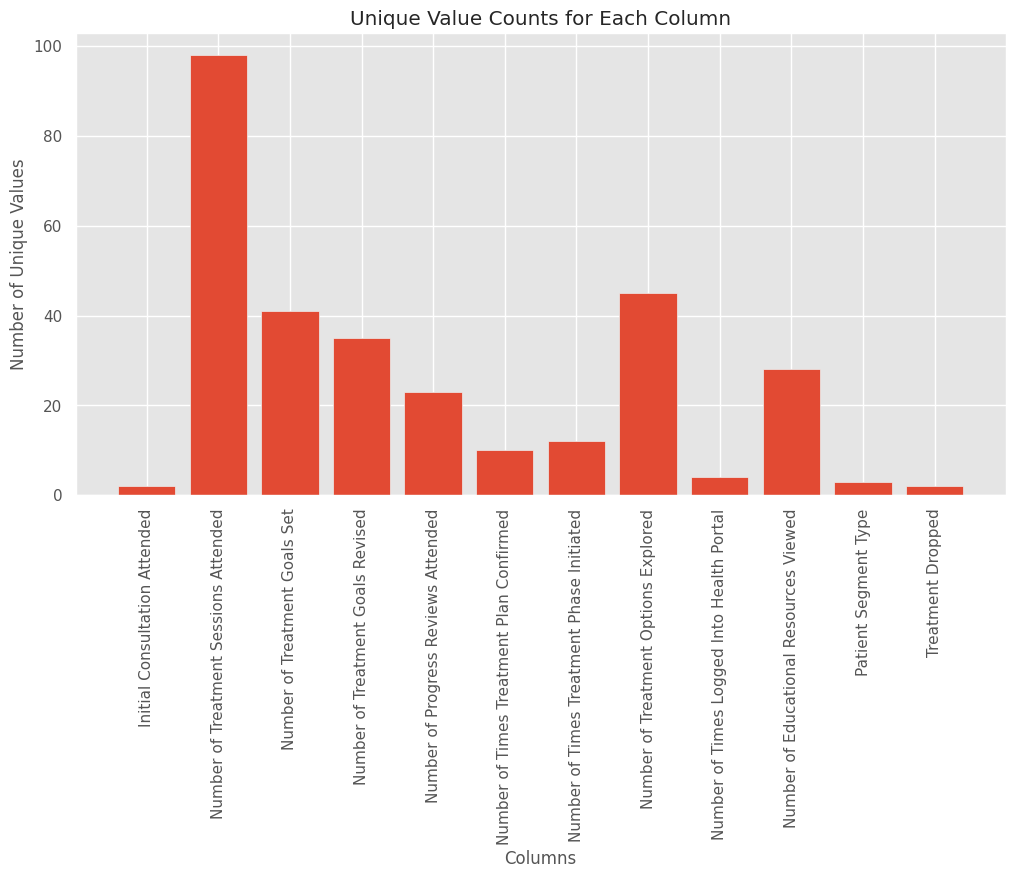

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df_with_outliers.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

checking the variability of the data without outliers

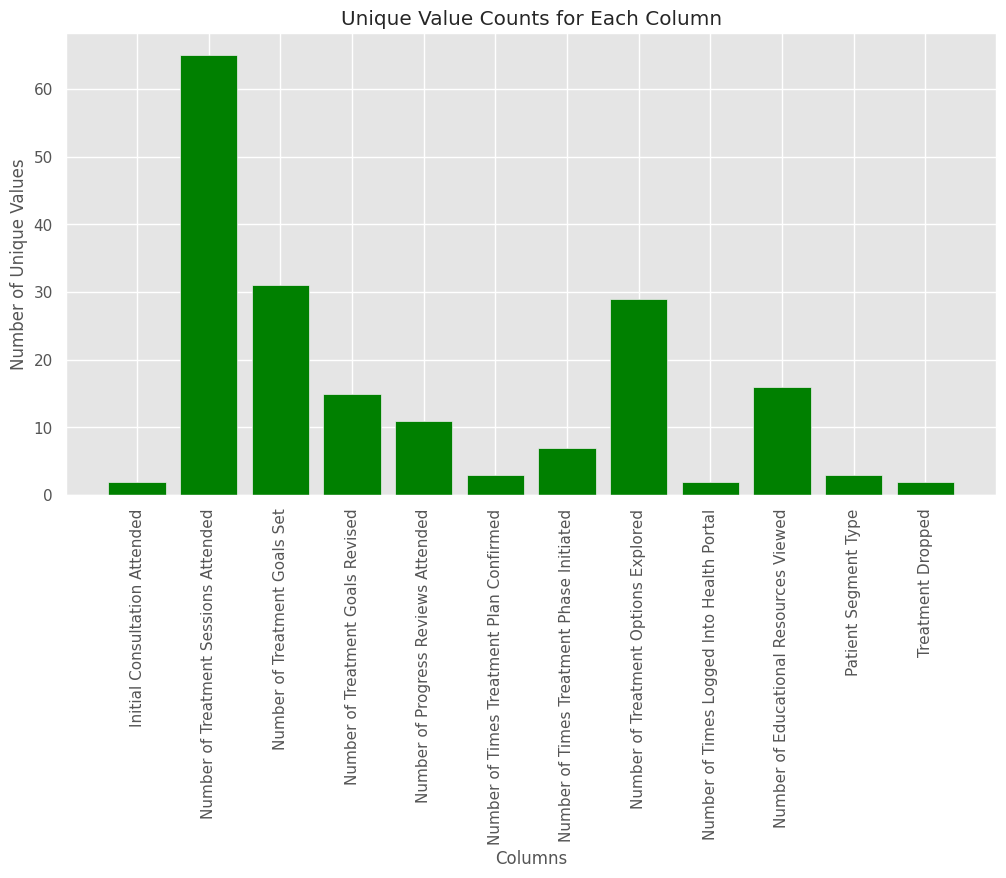

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df_without_outliers.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

from now onwards the data without outliers will be used for further processing.
Checking the impact of low variability columns on the target variable

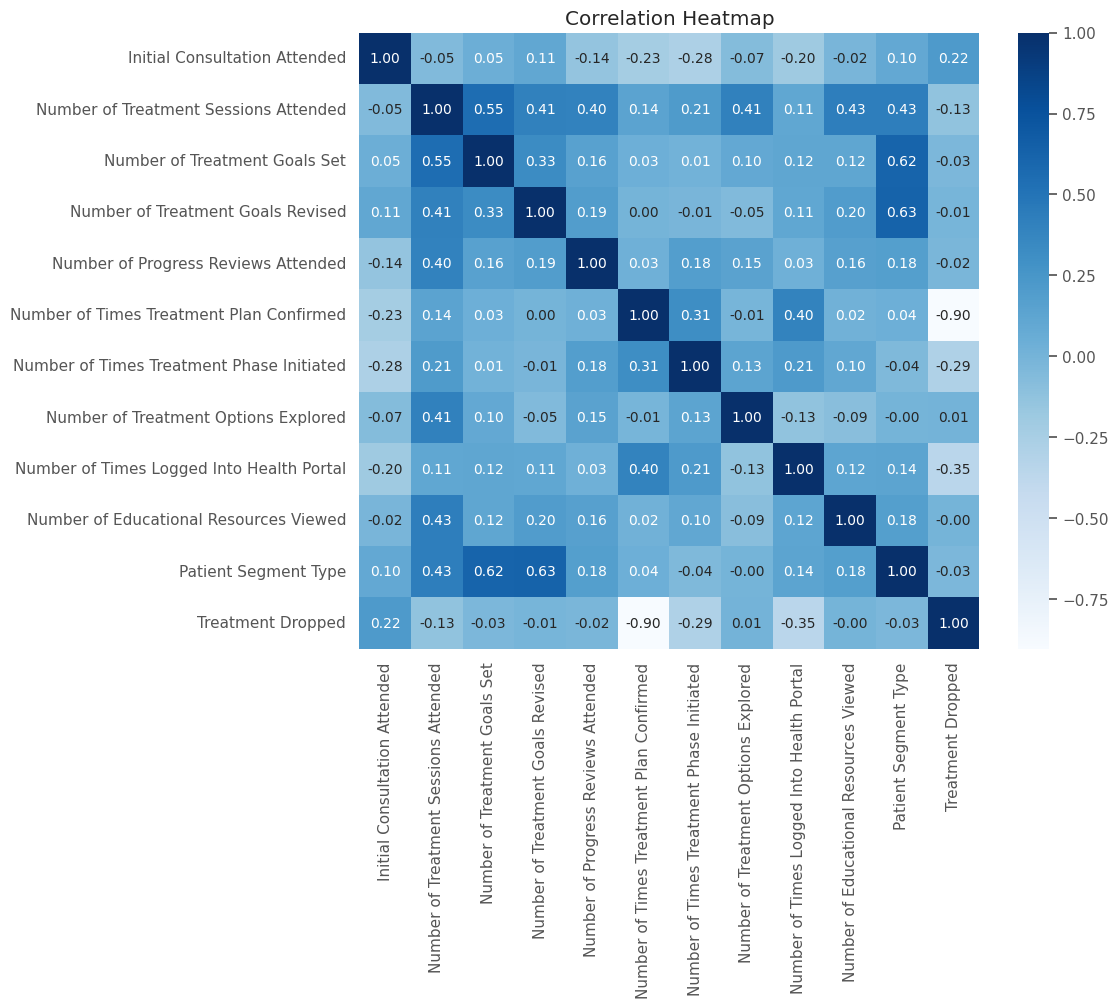

In [ ]:
corr = df_without_outliers.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

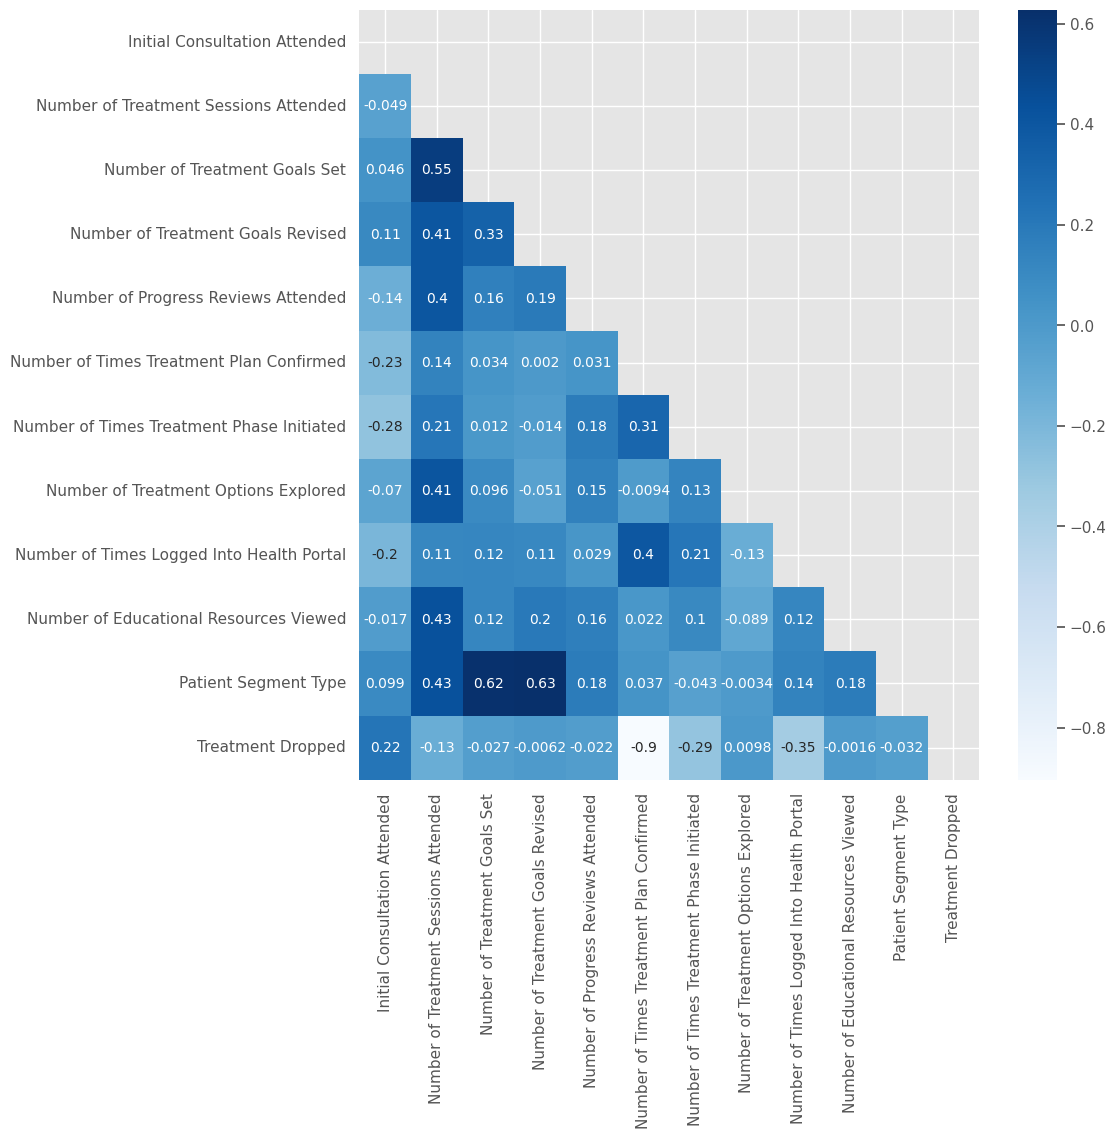

In [ ]:
# Generate a correlation matrix
corr = df_without_outliers.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking, cmap='Blues')
plt.show()

In [ ]:
df_without_outliers.shape

(3118, 12)

In [ ]:
# Step 1: Create a new DataFrame to store log-transformed features
log_transformed_df = pd.DataFrame()

# Step 2: Apply Log Transformation to all numerical columns
for col in df_without_outliers.columns:
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df_without_outliers[col]):
        # Add a small constant (1) to avoid log(0)
        log_transformed_df[f'Log_{col}'] = np.log(df_without_outliers[col] + 1)

# step 3:
log_transformed_df

Log_Initial Consultation Attended  \
0                              0.693147   
1                              0.000000   
2                              0.000000   
3                              0.000000   
4                              0.693147   
...                                 ...   
4275                           0.000000   
4278                           0.693147   
4279                           0.693147   
4280                           0.000000   
4283                           0.000000   

      Log_Number of Treatment Sessions Attended  \
0                                     -1.255481   
1                                      0.811152   
2                                     -0.661297   
3                                     -0.914891   
4                                      0.612927   
...                                         ...   
4275                                   0.581106   
4278                                  -0.780077   
4279                                   0.324501   
4280                                  -0.780077   
4283                                   0.612927   

      Log_Number of Treatment Goals Set  \
0                             -0.537585   
1                             -0.794906   
2                              0.108221   
3                             -0.794906   
4                              0.835991   
...                                 ...   
4275                          -0.018409   
4278                          -0.794906   
4279                           0.108221   
4280                          -0.333110   
4283                          -0.018409   

      Log_Number of Treatment Goals Revised  \
0                                 -0.388644   
1                                 -0.388644   
2                                 -0.388644   
3                                 -0.388644   
4                                  1.425046   
...                                     ...   
4275                              -0.388644   
4278                              -0.388644   
4279                               0.882946   
4280                              -0.388644   
4283                              -0.388644   

      Log_Number of Progress Reviews Attended  \
0                                   -1.216619   
1                                    0.151779   
2                                   -1.216619   
3                                    0.151779   
4                                   -0.314620   
...                                       ...   
4275                                 0.468589   
4278                                -1.216619   
4279                                 0.151779   
4280                                 0.468589   
4283                                 0.468589   

      Log_Number of Times Treatment Plan Confirmed  \
0                                        -0.526348   
1                                        -0.526348   
2                                         0.846731   
3                                        -0.526348   
4                                        -0.526348   
...                                            ...   
4275                                     -0.526348   
4278                                     -0.526348   
4279                                     -0.526348   
4280                                     -0.526348   
4283                                     -0.526348   

      Log_Number of Times Treatment Phase Initiated  \
0                                         -1.849489   
1                                         -1.849489   
2                                         -0.044008   
3                                         -1.849489   
4                                         -1.849489   
...                                             ...   
4275                                      -0.044008   
4278                                      -1.849489   
4279                                      -1.849489   
4280  

In [ ]:
df_without_outliers.shape

(3118, 12)

In [ ]:
log_transformed_df.shape

(3118, 12)

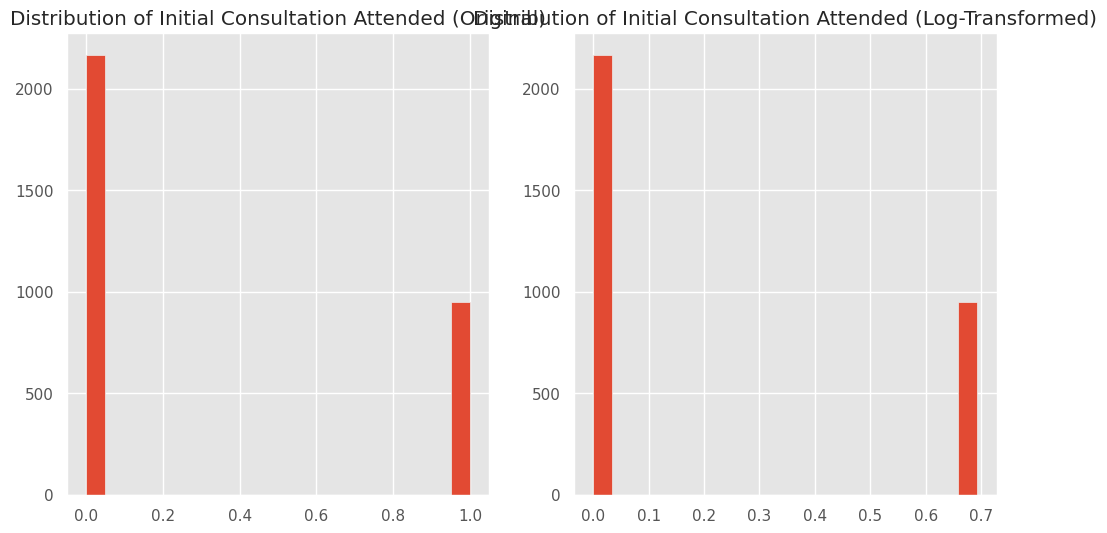

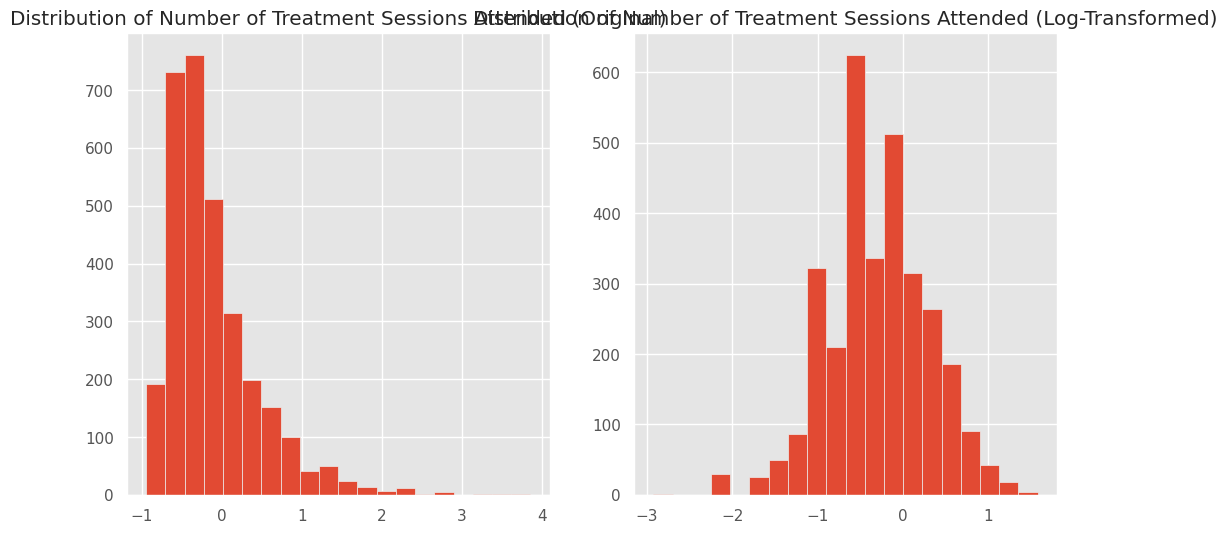

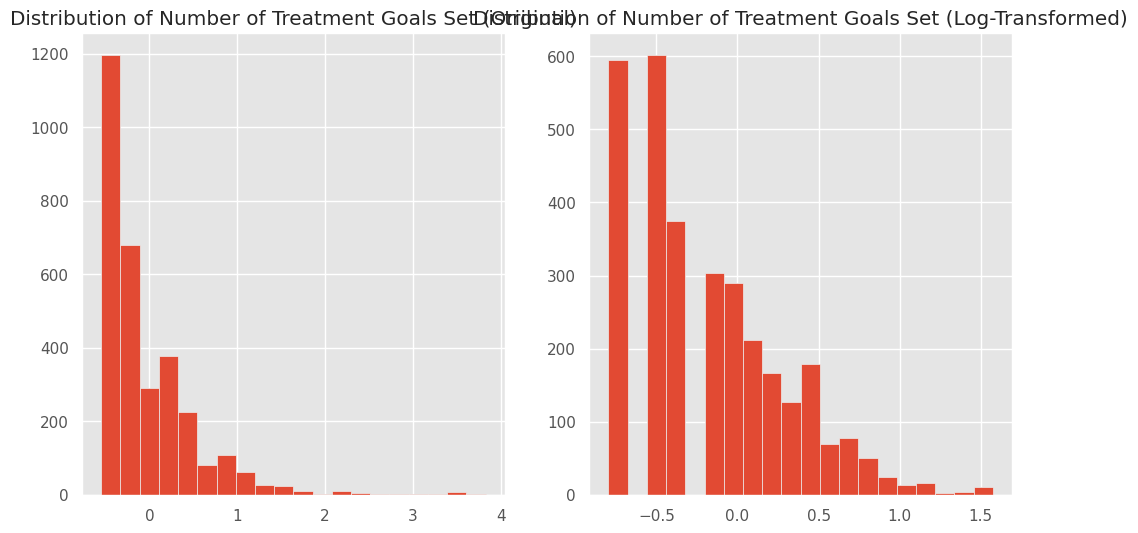

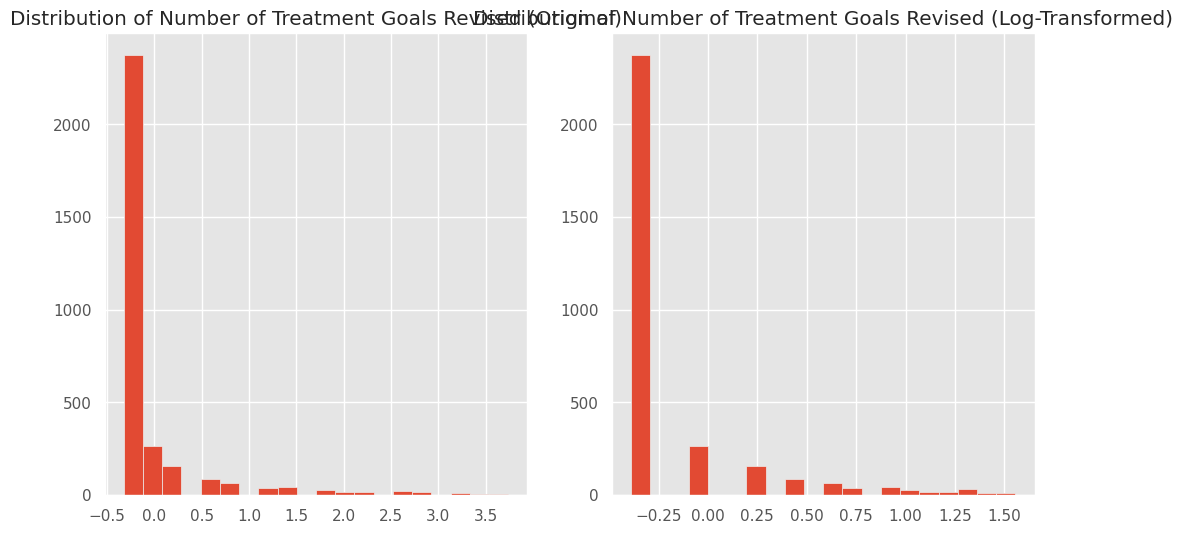

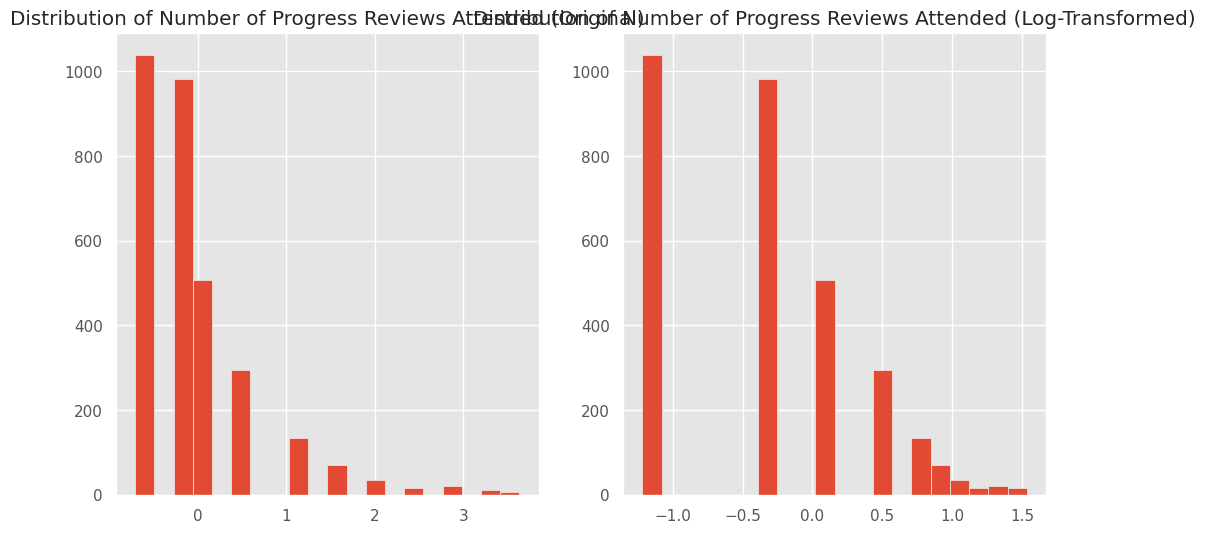

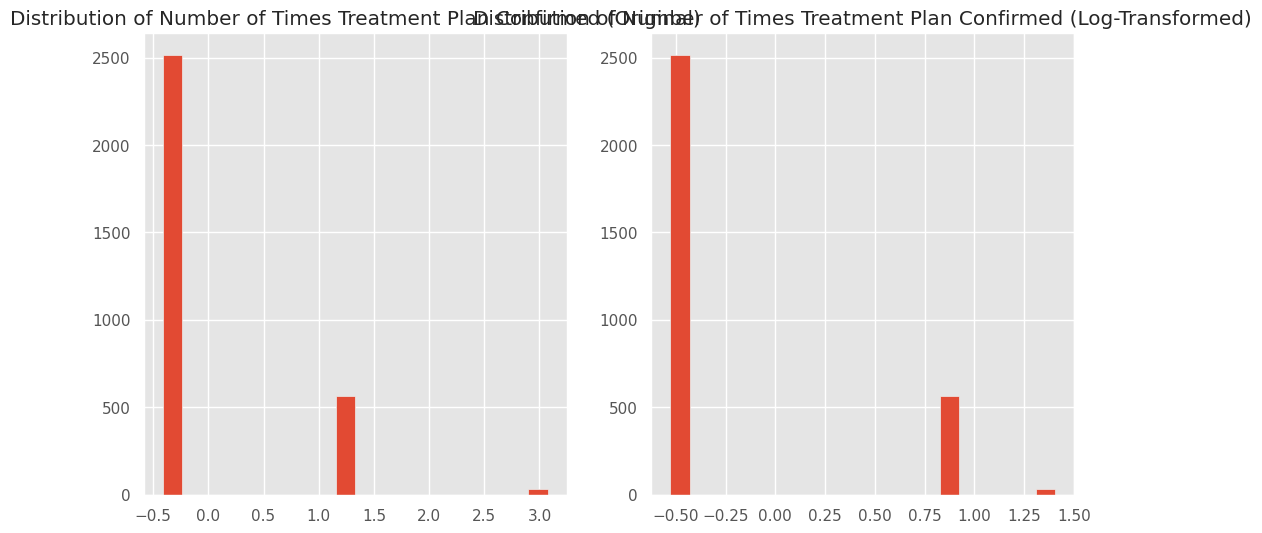

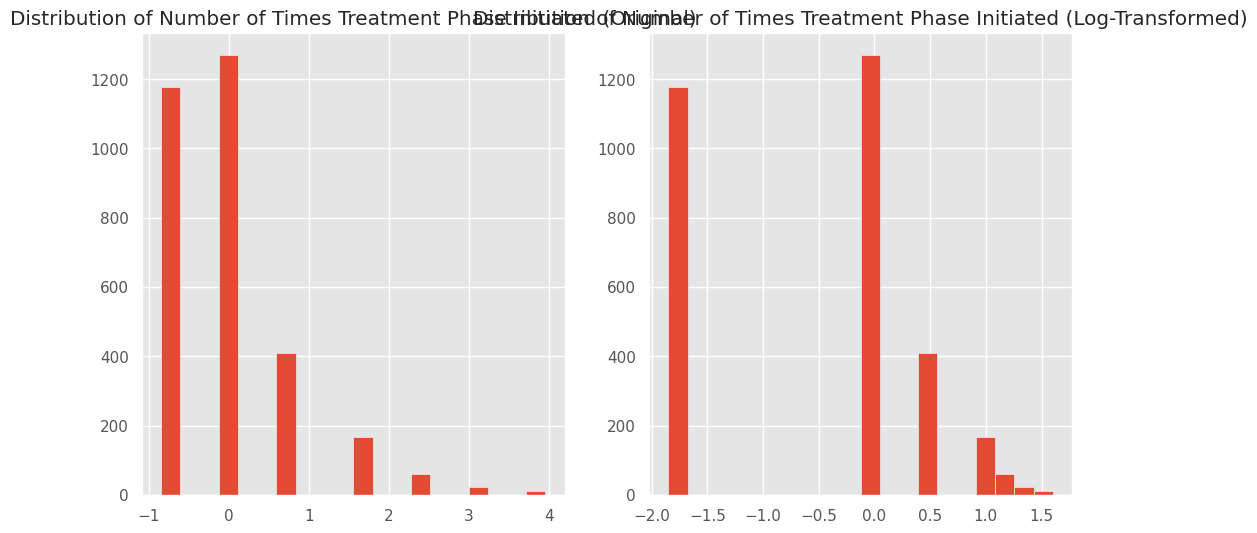

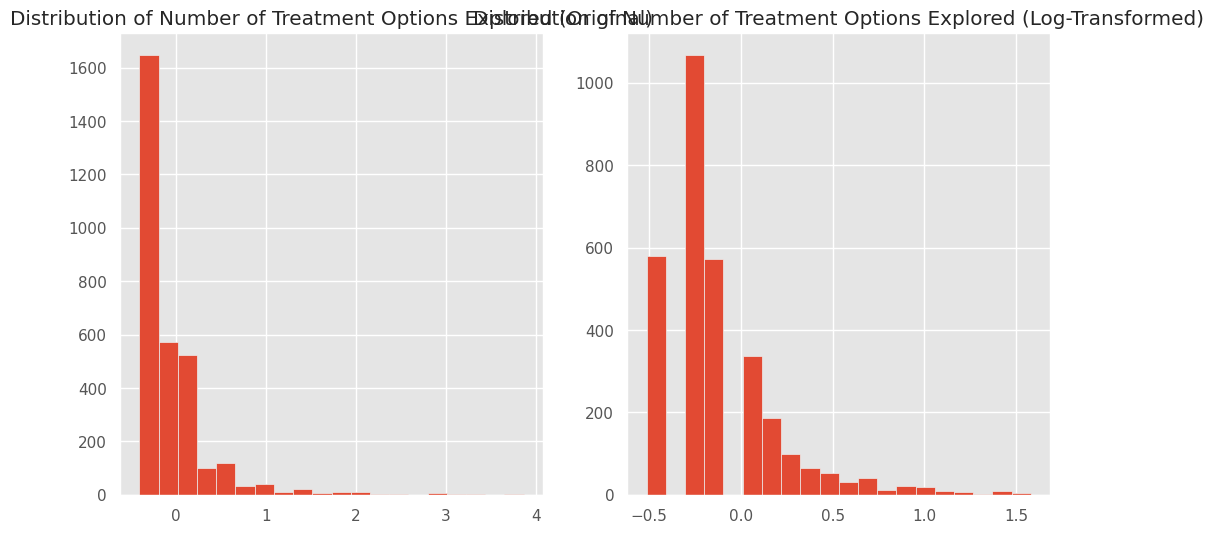

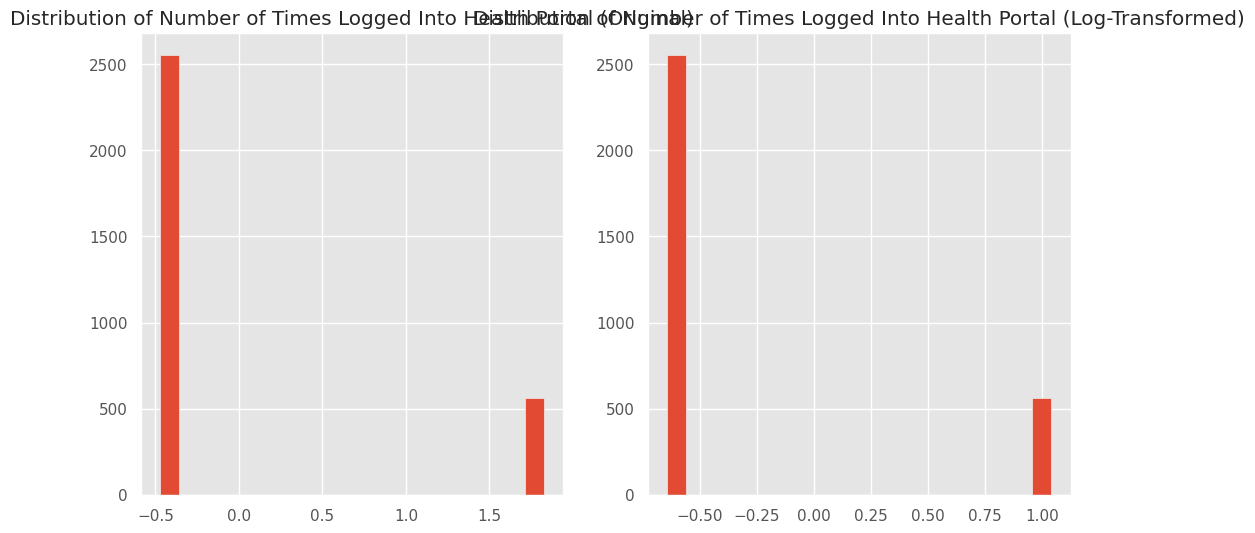

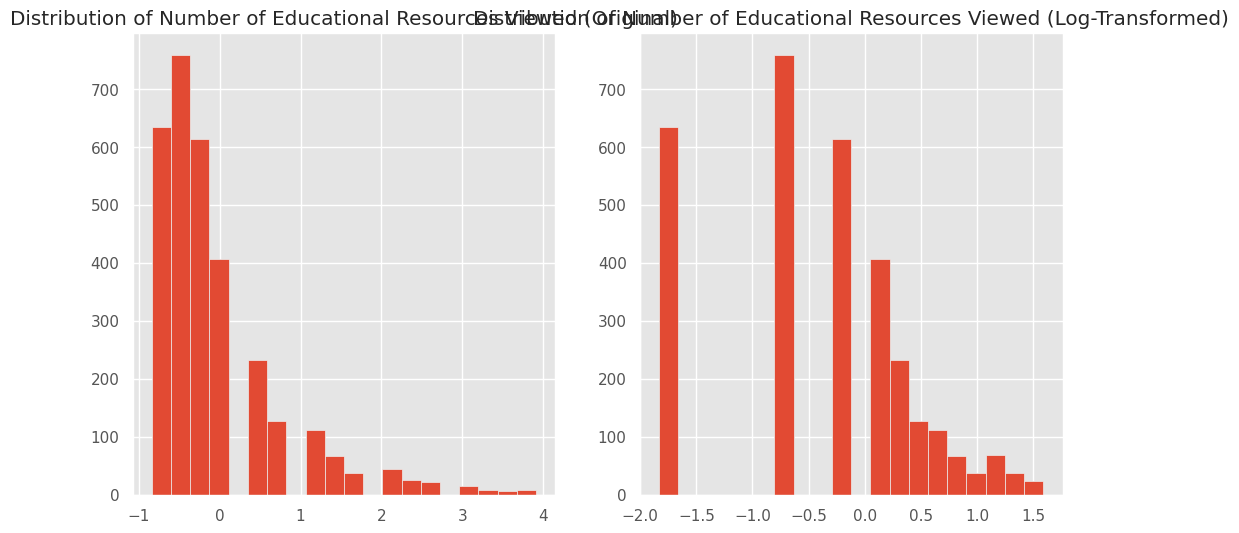

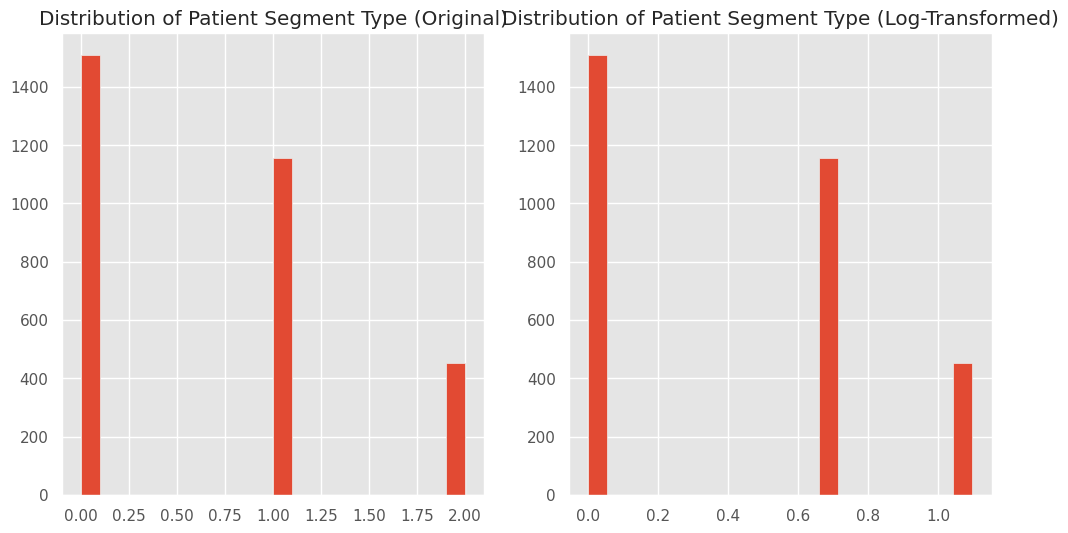

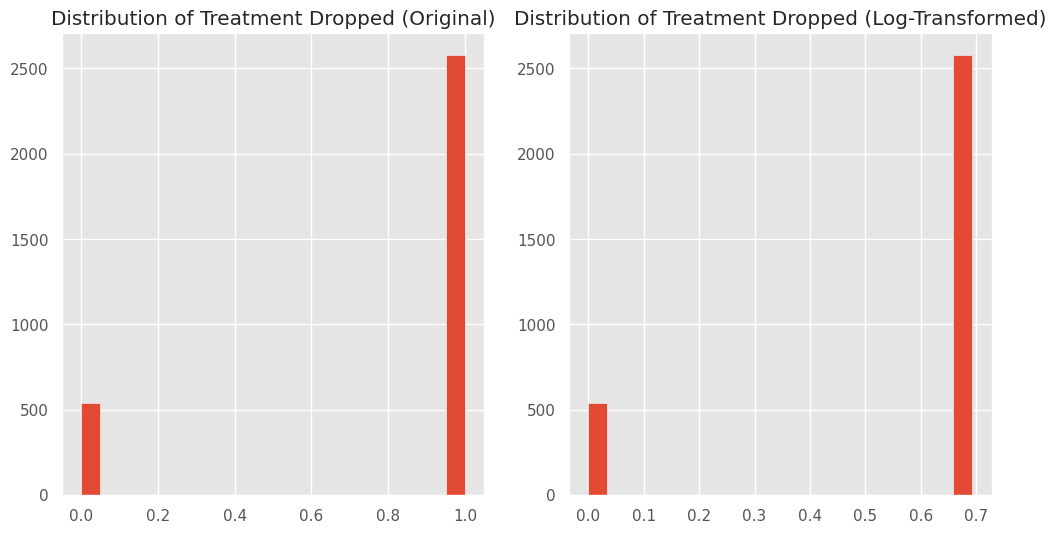

In [ ]:

# Assuming you have your original DataFrame (df_without_outliers) and the log-transformed DataFrame (log_transformed_df)

# Compare the distributions of original and log-transformed features
for col in df_without_outliers.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(12, 6))

  # Histogram of the original feature
  plt.subplot(1, 2, 1)
  plt.hist(df_without_outliers[col], bins=20)
  plt.title(f'Distribution of {col} (Original)')

  # Histogram of the log-transformed feature
  plt.subplot(1, 2, 2)
  plt.hist(log_transformed_df[f'Log_{col}'], bins=20)
  plt.title(f'Distribution of {col} (Log-Transformed)')

  plt.show()


# **4. Multicollinearity Handling**

## **4.1 Identifying Multicollinearity**

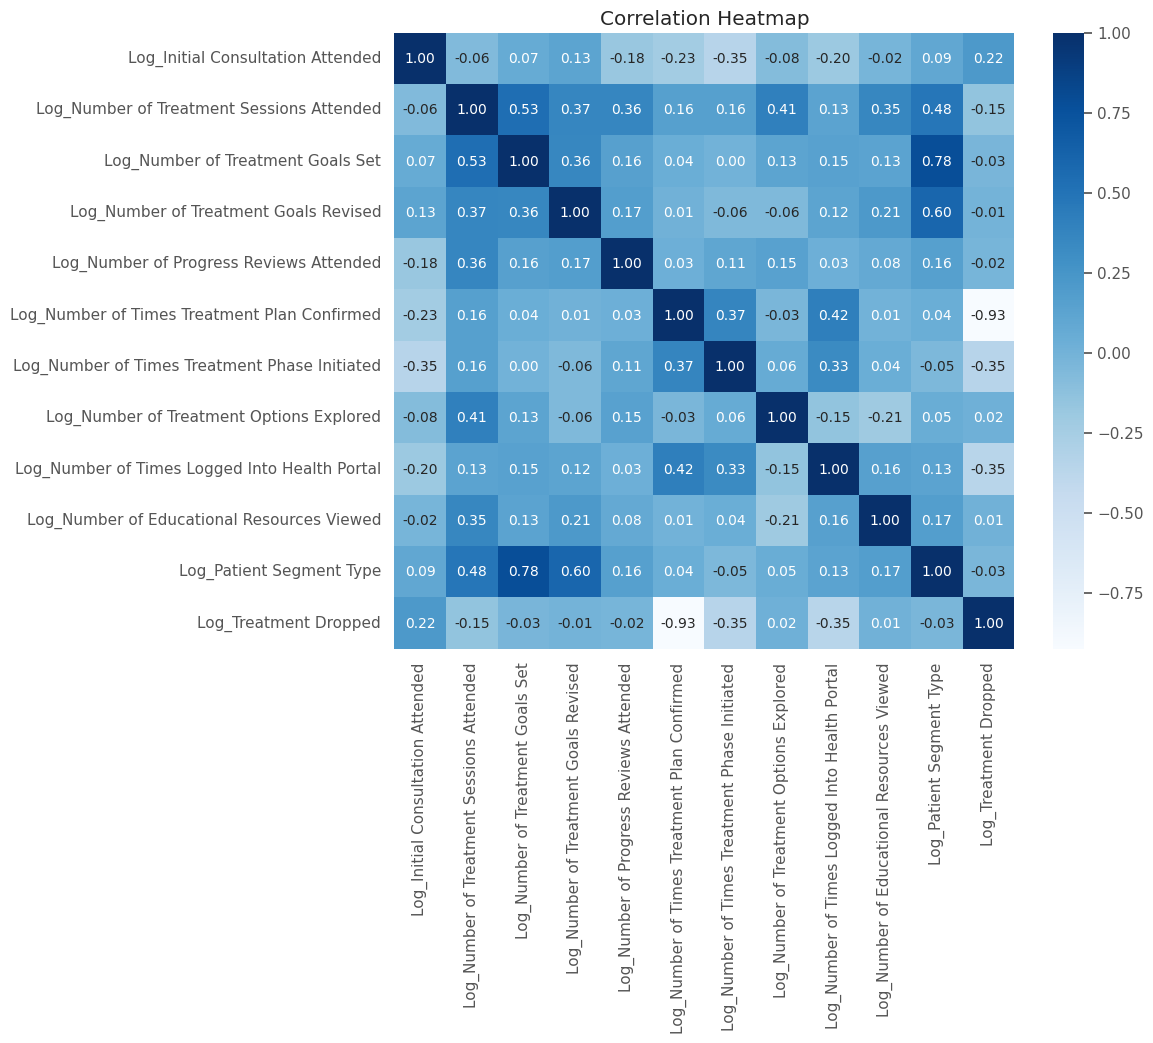

In [ ]:
corr = log_transformed_df.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

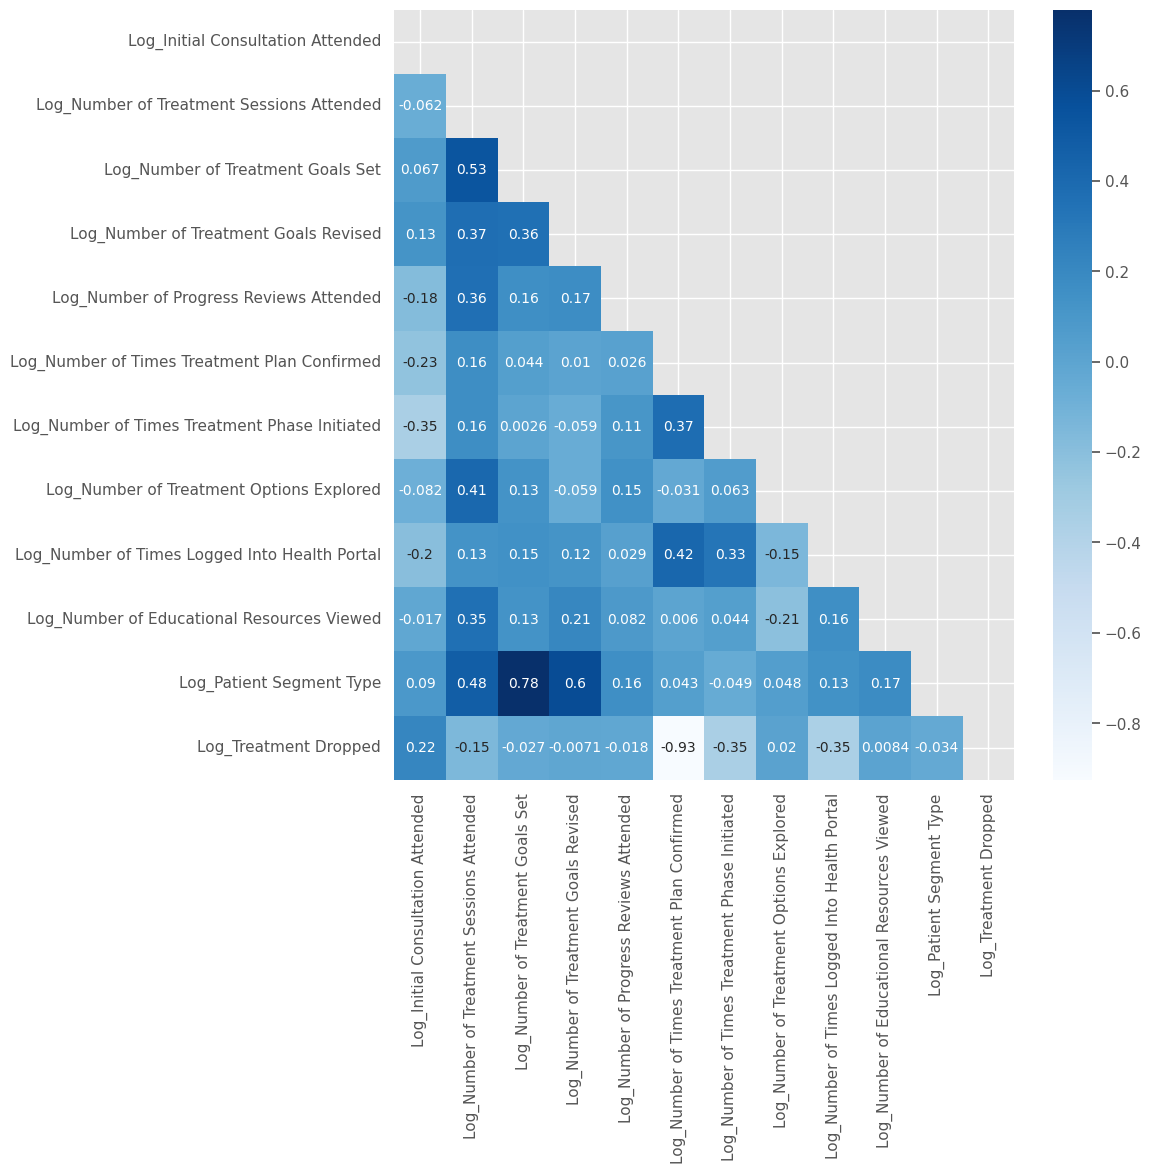

In [ ]:
# Generate a correlation matrix
corr = log_transformed_df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking, cmap='Blues')
plt.show()

## **4.2 Addressing Multicollinearity**

In [ ]:
log_transformed_df.shape

(3118, 12)

In [ ]:
log_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3118 entries, 0 to 4283
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Log_Initial Consultation Attended              3118 non-null   float64
 1   Log_Number of Treatment Sessions Attended      3118 non-null   float64
 2   Log_Number of Treatment Goals Set              3118 non-null   float64
 3   Log_Number of Treatment Goals Revised          3118 non-null   float64
 4   Log_Number of Progress Reviews Attended        3118 non-null   float64
 5   Log_Number of Times Treatment Plan Confirmed   3118 non-null   float64
 6   Log_Number of Times Treatment Phase Initiated  3118 non-null   float64
 7   Log_Number of Treatment Options Explored       3118 non-null   float64
 8   Log_Number of Times Logged Into Health Portal  3118 non-null   float64
 9   Log_Number of Educational Resources Viewed     3118 non-n

In [ ]:
log_transformed_df.describe()

Log_Initial Consultation Attended  \
count                        3118.000000   
mean                            0.211190   
std                             0.319088   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.693147   
max                             0.693147   

       Log_Number of Treatment Sessions Attended  \
count                                3118.000000   
mean                                   -0.298350   
std                                     0.599447   
min                                    -2.924410   
25%                                    -0.661297   
50%                                    -0.291123   
75%                                     0.090104   
max                                     1.579387   

       Log_Number of Treatment Goals Set  \
count                        3118.000000   
mean                           -0.186965   
std                             0.485535   
min                            -0.794906   
25%                            -0.537585   
50%                            -0.333110   
75%                             0.108221   
max                             1.573862   

       Log_Number of Treatment Goals Revised  \
count                            3118.000000   
mean                               -0.202719   
std                                 0.395017   
min                                -0.388644   
25%                                -0.388644   
50%                                -0.388644   
75%                                -0.388644   
max                                 1.555628   

       Log_Number of Progress Reviews Attended  \
count                              3118.000000   
mean                                 -0.349427   
std                                   0.714880   
min                                  -1.216619   
25%                                  -1.216619   
50%                                  -0.314620   
75%                                   0.151779   
max                                   1.533548   

       Log_Number of Times Treatment Plan Confirmed  \
count                                   3118.000000   
mean                                      -0.254805   
std                                        0.558254   
min                                       -0.526348   
25%                                       -0.526348   
50%                                       -0.526348   
75%                                       -0.526348   
max                                        1.404444   

       Log_Number of Times Treatment Phase Initiated  \
count                                    3118.000000   
mean                                       -0.553420   
std                                         1.061832   
min                                        -1.849489   
25%                                        -1.849489   
50%                                        -0.044008   
75%                                        -0.044008   
max                                         1.600416   

       Log_Number of Treatment Options Explored  \
count                               3118.000000   
mean                                  -0.134146   
std                                    0.340317   
min                                   -0.513554   
25%                                   -0.293997   
50%                                   -0.293997   
75%                                    0.038361   
max                                    1.580804   

       Log_Number of Times Logged Into Health Portal  \
count                                    3118.000000   
mean                                       -0.338079   
std                                         0.647257   
min                                        -0.642193   
25%                                        -0.642193   
50%                                        -0.642193   
75%    

dropping

Log_Number of Treatment Goals Set

Log_Number of Times Treatment Plan Confirmed (remove due to high negative correlation with the target).

In [ ]:
# Log_Number of Treatment Goals Set
# Log_Number of Times Treatment Plan Confirmed

log_transformed_df = log_transformed_df.drop(['Log_Number of Treatment Goals Set', 'Log_Number of Times Treatment Plan Confirmed'], axis=1)


In [ ]:
log_transformed_df.shape

(3118, 10)

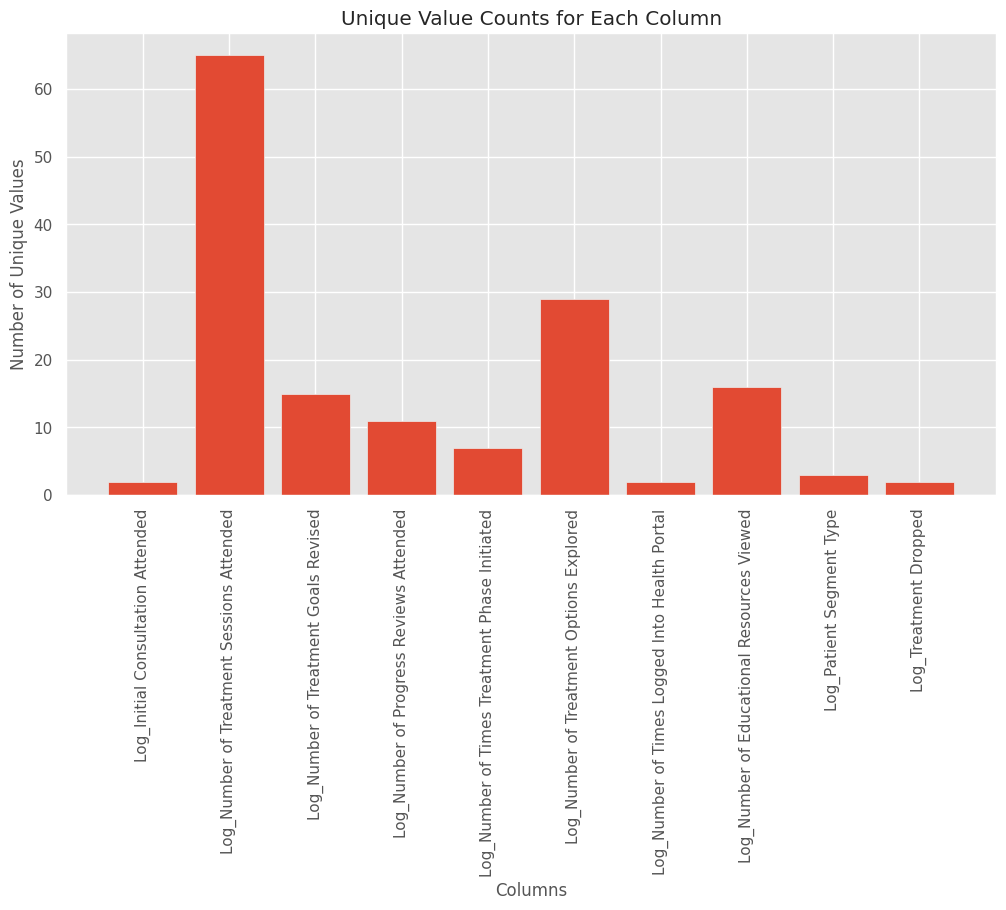

In [ ]:
# Calculate the number of unique values for each column
unique_counts = log_transformed_df.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

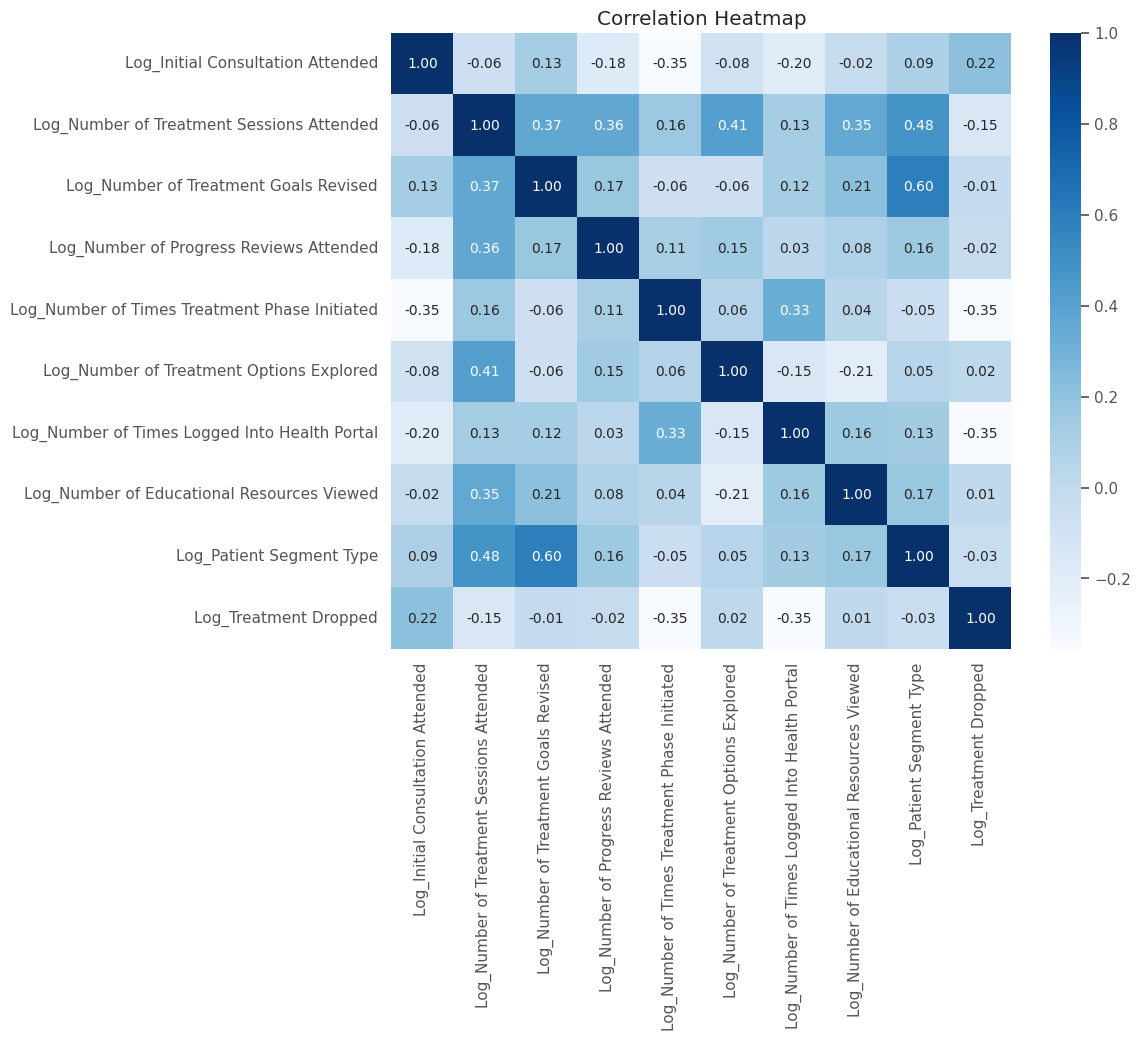

In [ ]:
corr = log_transformed_df.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

# **5. Model Building**

## **5.1 Feature Selection**

Selected Featuers

In [ ]:
log_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3118 entries, 0 to 4283
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Log_Initial Consultation Attended              3118 non-null   float64
 1   Log_Number of Treatment Sessions Attended      3118 non-null   float64
 2   Log_Number of Treatment Goals Revised          3118 non-null   float64
 3   Log_Number of Progress Reviews Attended        3118 non-null   float64
 4   Log_Number of Times Treatment Phase Initiated  3118 non-null   float64
 5   Log_Number of Treatment Options Explored       3118 non-null   float64
 6   Log_Number of Times Logged Into Health Portal  3118 non-null   float64
 7   Log_Number of Educational Resources Viewed     3118 non-null   float64
 8   Log_Patient Segment Type                       3118 non-null   float64
 9   Log_Treatment Dropped                          3118 non-n

## **5.2 Train Test Split**

In [ ]:
# reverse the target column

df_without_outliers['Treatment Dropped']


0       1
1       1
2       0
3       1
4       1
       ..
4275    1
4278    1
4279    1
4280    1
4283    1
Name: Treatment Dropped, Length: 3118, dtype: int64

In [ ]:
# replace the target column of log_transformed_df with target column of df_without_outliers

# Replace the target column in log_transformed_df with the target column from df_without_outliers
log_transformed_df['Log_Treatment Dropped'] = df_without_outliers['Treatment Dropped']


In [ ]:
log_transformed_df['Log_Treatment Dropped']

0       1
1       1
2       0
3       1
4       1
       ..
4275    1
4278    1
4279    1
4280    1
4283    1
Name: Log_Treatment Dropped, Length: 3118, dtype: int64

In [ ]:
log_transformed_df.shape

(3118, 10)

In [ ]:
log_transformed_df.head()

Log_Initial Consultation Attended  \
0                           0.693147   
1                           0.000000   
2                           0.000000   
3                           0.000000   
4                           0.693147   

   Log_Number of Treatment Sessions Attended  \
0                                  -1.255481   
1                                   0.811152   
2                                  -0.661297   
3                                  -0.914891   
4                                   0.612927   

   Log_Number of Treatment Goals Revised  \
0                              -0.388644   
1                              -0.388644   
2                              -0.388644   
3                              -0.388644   
4                               1.425046   

   Log_Number of Progress Reviews Attended  \
0                                -1.216619   
1                                 0.151779   
2                                -1.216619   
3                                 0.151779   
4                                -0.314620   

   Log_Number of Times Treatment Phase Initiated  \
0                                      -1.849489   
1                                      -1.849489   
2                                      -0.044008   
3                                      -1.849489   
4                                      -1.849489   

   Log_Number of Treatment Options Explored  \
0                                 -0.293997   
1                                 -0.114074   
2                                 -0.293997   
3                                  0.170603   
4                                  0.170603   

   Log_Number of Times Logged Into Health Portal  \
0                                      -0.642193   
1                                      -0.642193   
2                                      -0.642193   
3                                      -0.642193   
4                                      -0.642193   

   Log_Number of Educational Resources Viewed  Log_Patient Segment Type  \
0                                   -1.832166                  0.000000   
1                                   -0.231163                  0.000000   
2                                   -1.832166                  0.693147   
3                                   -1.832166                  0.000000   
4                                   -1.832166                  1.098612   

   Log_Treatment Dropped  
0                      1  
1                      1  
2                      0  
3                      1  
4                      1

In [ ]:
# save all the processed data into a csv named as final_processed_data.csv

log_transformed_df.to_csv('final_processed_data.csv', index=False)


In [ ]:
# split the log_transformed_df

X = log_transformed_df.drop('Log_Treatment Dropped', axis=1)
y = log_transformed_df['Log_Treatment Dropped']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

Log_Initial Consultation Attended  \
0                              0.693147   
1                              0.000000   
2                              0.000000   
3                              0.000000   
4                              0.693147   
...                                 ...   
4275                           0.000000   
4278                           0.693147   
4279                           0.693147   
4280                           0.000000   
4283                           0.000000   

      Log_Number of Treatment Sessions Attended  \
0                                     -1.255481   
1                                      0.811152   
2                                     -0.661297   
3                                     -0.914891   
4                                      0.612927   
...                                         ...   
4275                                   0.581106   
4278                                  -0.780077   
4279                                   0.324501   
4280                                  -0.780077   
4283                                   0.612927   

      Log_Number of Treatment Goals Revised  \
0                                 -0.388644   
1                                 -0.388644   
2                                 -0.388644   
3                                 -0.388644   
4                                  1.425046   
...                                     ...   
4275                              -0.388644   
4278                              -0.388644   
4279                               0.882946   
4280                              -0.388644   
4283                              -0.388644   

      Log_Number of Progress Reviews Attended  \
0                                   -1.216619   
1                                    0.151779   
2                                   -1.216619   
3                                    0.151779   
4                                   -0.314620   
...                                       ...   
4275                                 0.468589   
4278                                -1.216619   
4279                                 0.151779   
4280                                 0.468589   
4283                                 0.468589   

      Log_Number of Times Treatment Phase Initiated  \
0                                         -1.849489   
1                                         -1.849489   
2                                         -0.044008   
3                                         -1.849489   
4                                         -1.849489   
...                                             ...   
4275                                      -0.044008   
4278                                      -1.849489   
4279                                      -1.849489   
4280                                      -1.849489   
4283                                      -0.044008   

      Log_Number of Treatment Options Explored  \
0                                    -0.293997   
1                                    -0.114074   
2                                    -0.293997   
3                                     0.170603   
4                                     0.170603   
...                                        ...   
4275                                  0.287382   
4278                                 -0.293997   
4279                                  0.038361   
4280                                 -0.293997   
4283                                  0.486591   

      Log_Number of Times Logged Into Health Portal  \
0                                         -0.642193   
1                                         -0.642193   
2                                         -0.642193   
3                                         -0.642193   
4                                         -0.642193   
...                                             ...   
4275                                      -0.642193   
4278                

In [ ]:
y

0       1
1       1
2       0
3       1
4       1
       ..
4275    1
4278    1
4279    1
4280    1
4283    1
Name: Log_Treatment Dropped, Length: 3118, dtype: int64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2494, 9), (624, 9), (2494,), (624,))

In [ ]:
y_train


643     0
645     1
2873    1
910     1
4183    1
       ..
4243    1
1379    0
1422    1
1638    1
1085    1
Name: Log_Treatment Dropped, Length: 2494, dtype: int64

In [ ]:
y_test

850     1
2104    1
703     1
993     1
2303    1
       ..
1680    1
3304    0
2461    0
3007    1
321     1
Name: Log_Treatment Dropped, Length: 624, dtype: int64

## **5.3 Model Fitting**

In [ ]:
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)  # C is the inverse of regularization strength
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [ ]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.17      0.26       125
           1       0.82      0.97      0.89       499

    accuracy                           0.81       624
   macro avg       0.70      0.57      0.58       624
weighted avg       0.78      0.81      0.76       624



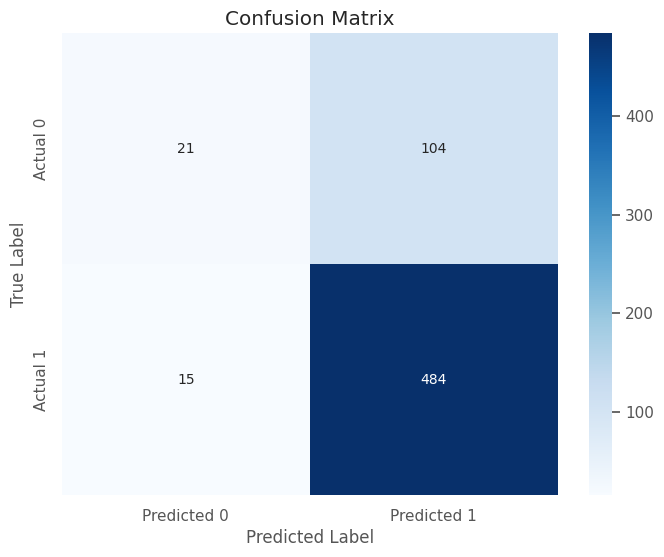

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## **5.4 K-Fold Cross Validation And 5.5 Model Evaluation**

In [ ]:

# Define K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Output the results
print(f"Cross-Validation Scores for {k} folds: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {np.std(cv_scores):.4f}")



Cross-Validation Scores for 5 folds: [0.80929487 0.81089744 0.84775641 0.82022472 0.85232745]
Mean Cross-Validation Score: 0.8281
Standard Deviation of Cross-Validation Scores: 0.0184


In [ ]:
# Fit the model to the entire dataset after cross-validation for final training
model.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
predictions = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.28       125
           1       0.83      0.97      0.89       499

    accuracy                           0.81       624
   macro avg       0.70      0.57      0.58       624
weighted avg       0.78      0.81      0.77       624



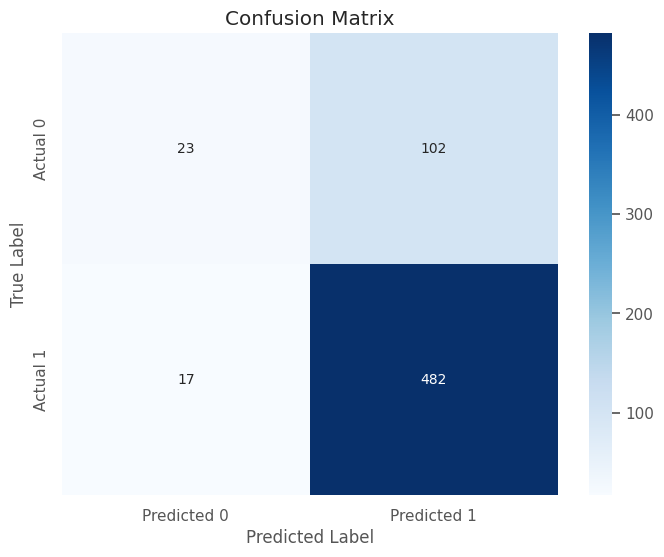

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


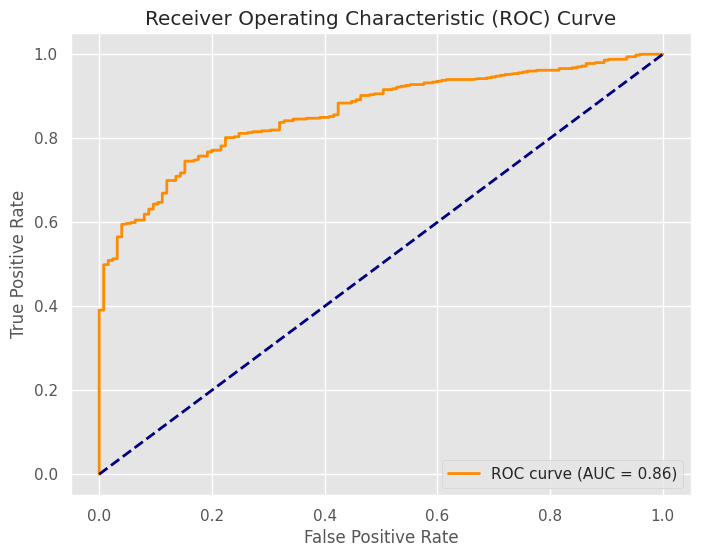

In [ ]:
# draw ROC-AUC curve for the model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (Treatment Dropped = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Interpretation of Your ROC Curve**

**AUC of 0.86:** This is a strong indicator that the classifier is effective, as it shows a high true positive rate for a relatively low false positive rate.

**Curve Shape:** If the curve is steep (closer to the top left corner), this suggests that the model is effective at identifying positive cases without generating many false positives.

**Threshold Adjustment:** The ROC curve allows you to visualize and select the optimal threshold for classification based on the trade-offs between true positives and false positives.

# **Improving the model performance**

**Address Class Imbalance:**

**Resampling:** Oversampling the minority class or undersampling the majority class.
Synthetic Data Generation: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Log_Treatment Dropped
1    2580
0    2580
Name: count, dtype: int64


In [ ]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4128, 9), (1032, 9), (4128,), (1032,))

In [ ]:
X_train

Log_Initial Consultation Attended  \
1103                           0.000000   
4708                           0.000000   
4111                           0.000000   
2718                           0.693147   
99                             0.000000   
...                                 ...   
4426                           0.693147   
466                            0.000000   
3092                           0.000000   
3772                           0.000000   
860                            0.000000   

      Log_Number of Treatment Sessions Attended  \
1103                                  -0.661297   
4708                                  -0.650034   
4111                                  -0.477991   
2718                                  -0.371624   
99                                     0.404773   
...                                         ...   
4426                                  -0.550199   
466                                   -1.482240   
3092                                  -0.555140   
3772                                  -0.082452   
860                                    0.931988   

      Log_Number of Treatment Goals Revised  \
1103                              -0.388644   
4708                              -0.388644   
4111                              -0.388644   
2718                               0.436960   
99                                -0.388644   
...                                     ...   
4426                              -0.388644   
466                               -0.388644   
3092                              -0.388644   
3772                              -0.388644   
860                                0.882946   

      Log_Number of Progress Reviews Attended  \
1103                                -0.314620   
4708                                -1.216619   
4111                                -1.216619   
2718                                -0.314620   
99                                  -0.314620   
...                                       ...   
4426                                -1.216619   
466                                 -1.216619   
3092                                -1.216619   
3772                                -0.314620   
860                                  0.151779   

      Log_Number of Times Treatment Phase Initiated  \
1103                                      -1.849489   
4708                                       0.674348   
4111                                      -0.044008   
2718                                      -1.849489   
99                                        -0.044008   
...                                             ...   
4426                                      -0.027656   
466                                       -0.044008   
3092                                      -1.849489   
3772                                      -0.044008   
860                                       -0.044008   

      Log_Number of Treatment Options Explored  \
1103                                 -0.114074   
4708                                 -0.513554   
4111                                 -0.114074   
2718                                 -0.293997   
99                                    1.263176   
...                                        ...   
4426                                 -0.103266   
466                                  -0.293997   
3092                                 -0.293997   
3772                                 -0.246222   
860                                   0.573053   

      Log_Number of Times Logged Into Health Portal  \
1103                                      -0.642193   
4708                                       1.039062   
4111                                       1.039062   
2718                                      -0.642193   
99                                        -0.642193   
...                                             ...   
4426                                      -0.642193   
466                 

In [ ]:
X_test

Log_Initial Consultation Attended  \
2387                           0.000000   
3525                           0.000000   
654                            0.000000   
1084                           0.000000   
2516                           0.693147   
...                                 ...   
1038                           0.000000   
1730                           0.693147   
3690                           0.000000   
1881                           0.693147   
2883                           0.000000   

      Log_Number of Treatment Sessions Attended  \
2387                                  -0.661297   
3525                                   0.032987   
654                                   -1.070755   
1084                                  -0.459178   
2516                                  -0.914891   
...                                         ...   
1038                                   0.673682   
1730                                   1.208633   
3690                                  -0.045351   
1881                                   0.612927   
2883                                  -0.082452   

      Log_Number of Treatment Goals Revised  \
2387                              -0.388644   
3525                              -0.118221   
654                               -0.388644   
1084                              -0.388644   
2516                              -0.388644   
...                                     ...   
1038                              -0.388644   
1730                              -0.388644   
3690                              -0.144241   
1881                              -0.388644   
2883                               0.996217   

      Log_Number of Progress Reviews Attended  \
2387                                 0.151779   
3525                                -1.216619   
654                                 -0.314620   
1084                                 0.151779   
2516                                -1.216619   
...                                       ...   
1038                                 0.151779   
1730                                -0.314620   
3690                                -0.314620   
1881                                 0.902358   
2883                                -1.216619   

      Log_Number of Times Treatment Phase Initiated  \
2387                                      -0.044008   
3525                                       0.102128   
654                                       -1.849489   
1084                                       0.563366   
2516                                      -1.849489   
...                                             ...   
1038                                       0.938524   
1730                                       1.424424   
3690                                      -0.044008   
1881                                       0.563366   
2883                                      -1.849489   

      Log_Number of Treatment Options Explored  \
2387                                 -0.293997   
3525                                 -0.114074   
654                                   0.038361   
1084                                 -0.513554   
2516                                 -0.513554   
...                                        ...   
1038                                  0.919582   
1730                                  0.038361   
3690                                 -0.148265   
1881                                  0.976503   
2883                                 -0.293997   

      Log_Number of Times Logged Into Health Portal  \
2387                                      -0.642193   
3525                                      -0.642193   
654                                       -0.642193   
1084                                      -0.642193   
2516                                      -0.642193   
...                                             ...   
1038                                      -0.642193   
1730                

In [ ]:
y_train

1103    1
4708    0
4111    0
2718    1
99      1
       ..
4426    0
466     1
3092    1
3772    0
860     1
Name: Log_Treatment Dropped, Length: 4128, dtype: int64

In [ ]:
y_test

2387    1
3525    0
654     1
1084    1
2516    1
       ..
1038    1
1730    1
3690    0
1881    0
2883    1
Name: Log_Treatment Dropped, Length: 1032, dtype: int64

In [ ]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       533
           1       0.82      0.73      0.77       499

    accuracy                           0.79      1032
   macro avg       0.79      0.79      0.79      1032
weighted avg       0.79      0.79      0.79      1032

Accuracy: 0.7907
ROC AUC: 0.8523


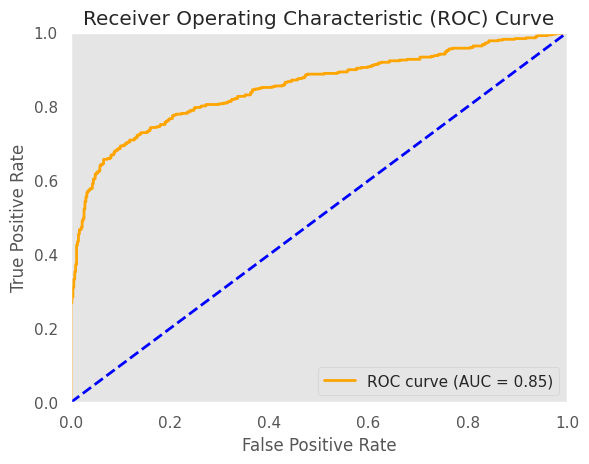

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **Presentation Of Results, Discussion, Explanation and Conclusion**

## **Results**

### **1. Model Performance Prior to K-Fold Cross-Validation**
The initial model demonstrated imbalanced performance, with high precision (0.82) and recall (0.97) for patients dropping out (class 1), while classifying non-dropping patients (class 0) with low precision (0.58) and recall (0.17), resulting in an overall accuracy of 0.81.

### **2. Model Performance After K-Fold Cross-Validation**
Post K-fold cross-validation, the model showed slight decreases in precision (0.57) and recall (0.18) for class 0, while maintaining strong metrics for class 1 (precision: 0.83, recall: 0.97). Overall accuracy remained stable at 0.81, indicating consistency in model evaluation.

### 3. **Model Performance Following SMOTE Implementation**
After applying SMOTE to address class imbalance, class 0 metrics improved significantly (precision: 0.77, recall: 0.85), resulting in an F1-score of 0.81. The overall accuracy slightly decreased to 0.7907, while the ROC AUC increased to 0.8523, reflecting enhanced model discrimination between the classes.


---


## **Discussion And Explanation**

### **Data Exploration And Preprocessing**
In data exploration and preprocessing phase, univariate and bivariate analysis of the dataset is done.

**Univariate analysis** shows that almost all numerical variables are highly positive skewed. From the boxplots, I have got an idea about the outliers. For most of the variables, majority of the values are showing as outliers. Mean, median and other statistical descriptions are find for each numerical column. For understanding distribution of the data, boxplots, KDE and histograms are used. For univariate analysis of categorical variables, mode, bar chart and pie charts are used.

**Bivariate analysis** is done on three categories of variables for find the relationship among the variable. For **numerical-numerical** variables, pairplots are used. For **numerical-categorical** combination of the  variables, KDE plots are used and for the **categorical-categorical** combination heatmaps are used.

**Missing Values and Duplicates** are dropped because only 0.3% of the data contains the missing values. and Duplicates are dropped because there are alot of rows with exactly the same values. These are not playing any part in variability in the data that is required for learning.

**Standardization** is used as the normalization technique. For logistic regression, standardization (Z-score normalization) is often the best choice because it centers the data around the mean and gives each feature a consistent influence on the model, regardless of the original scale.

**Encoding Of Categorical Variables** only 1 out of 3 categorical variables is encoded using the label encoding.

**Outlier Detection**: There are alot of outliers but we can't remove all of them because they are present in the form of clusters near the boundary values also evident from the boxplt. So z-score is used with a relaxed treshold of 4 for encoorperating the maximum outliers that are near to boundary values.



### **Feature Engineering**
First of all, I have checked the variablility of each column with and without outliers. Here I have three options for engineeeing. Creating new features, transforming features or combining the features to make new ones. Creating new features does not make sense to me. Combining low variability column works in some cases but here it is not serving the purpose of engineering. Thats' why I have transformed data using log_tranformation because it is the best choice in case of positively skewed data.

### **Multicollinearity Handling**
the most collinear columns are dropped

Log_Number of Treatment Goals Set (High positive correlation)

Log_Number of Times Treatment Plan Confirmed (remove due to high negative correlation with the target).

### **Model Building**
**Feature Selection** 9 features are selected for predicting the target variable

**Train-Test Splitting** is done here in 80:20 ratio

**Model Fitting** is done and initial classification report is generated

**K-fold cross validation** is done and again the model is tried to fit. The second classification report and the ROC-AUC is calculated here for comparison.

### **Improving the Model Performance**
After observing the first two classification reports, it is evident that there is class imbalance that is impacting the results. So SMOTE is used for resampling. It undersamples the higher class and oversamples the lower class. Then again the model building and fitting is done. At this stage, the final classification report is generated whose stats are already given above under results heading.


---



## **Challenges**
The challenges I faced in this assignment are listed below:
1. Learning and Application of Data preprocessing method and analysing the graphs.
2. Feature Engineering
3. Dealing with outliers


---


## **Conclusion**

This analysis focused on developing a logistic regression model to predict patient dropout from a long-term treatment program. Initial results revealed significant class imbalance, which affected model performance. By applying SMOTE, I have improved the balance of classes, leading to better precision and recall metrics, particularly for the minority class.

The final model achieved a ROC AUC score of 0.8523, indicating strong discrimination ability. Throughout the process, I tried managed missing values, duplicates, and outliers, ensuring robust data quality.

Despite challenges in data preprocessing and feature engineering, the insights gained enhance our understanding of patient behavior, providing a foundation for improving retention strategies in healthcare settings.

---

